# Load data


### Load all necessary packages

In [1]:
import zipfile
import os
import shutil
import random
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, SubsetRandomSampler
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
from sklearn.metrics import confusion_matrix
import itertools

### Unzip data files

In [2]:
zip_dir = '/content/'
extract_dir = '/content/extracted/'

# create unzip file dictionary
os.makedirs(extract_dir, exist_ok=True)

#unzip process
for zip_file in os.listdir(zip_dir):
    if zip_file.endswith('.zip'): #find all zip files
        plant_name = zip_file.split('.')[0]
        plant_dir = os.path.join(extract_dir, plant_name)
        os.makedirs(plant_dir, exist_ok=True)

        with zipfile.ZipFile(os.path.join(zip_dir, zip_file), 'r') as zip_ref:
            zip_ref.extractall(plant_dir)

### Change all file name with plants name + disease name

In [3]:
#Apple
# Train
!mv /content/extracted/Apple/Train/Apple\ Scab /content/extracted/Apple/Train/Apple-Apple\ Scab
!mv /content/extracted/Apple/Train/Cedar\ Apple\ Rust /content/extracted/Apple/Train/Apple-Cedar\ Apple\ Rust
!mv /content/extracted/Apple/Train/Black\ Rot /content/extracted/Apple/Train/Apple-Black\ Rot
!mv /content/extracted/Apple/Train/Healthy /content/extracted/Apple/Train/Apple-Healthy

# Test
!mv /content/extracted/Apple/Test/Apple\ Scab /content/extracted/Apple/Test/Apple-Apple\ Scab
!mv /content/extracted/Apple/Test/Cedar\ Apple\ Rust /content/extracted/Apple/Test/Apple-Cedar\ Apple\ Rust
!mv /content/extracted/Apple/Test/Black\ Rot /content/extracted/Apple/Test/Apple-Black\ Rot
!mv /content/extracted/Apple/Test/Healthy /content/extracted/Apple/Test/Apple-Healthy

# Val
!mv /content/extracted/Apple/Val/Apple\ Scab /content/extracted/Apple/Val/Apple-Apple\ Scab
!mv /content/extracted/Apple/Val/Cedar\ Apple\ Rust /content/extracted/Apple/Val/Apple-Cedar\ Apple\ Rust
!mv /content/extracted/Apple/Val/Black\ Rot /content/extracted/Apple/Val/Apple-Black\ Rot
!mv /content/extracted/Apple/Val/Healthy /content/extracted/Apple/Val/Apple-Healthy

In [4]:
#Bell Pepper
# Train
!mv /content/extracted/Bell\ Pepper/Train/Bacterial\ Spot /content/extracted/Bell\ Pepper/Train/Bell\ Pepper-Bacterial\ Spot
!mv /content/extracted/Bell\ Pepper/Train/Healthy /content/extracted/Bell\ Pepper/Train/Bell\ Pepper-Healthy

# Test
!mv /content/extracted/Bell\ Pepper/Test/Bacterial\ Spot /content/extracted/Bell\ Pepper/Test/Bell\ Pepper-Bacterial\ Spot
!mv /content/extracted/Bell\ Pepper/Test/Healthy /content/extracted/Bell\ Pepper/Test/Bell\ Pepper-Healthy

# Val
!mv /content/extracted/Bell\ Pepper/Val/Bacterial\ Spot /content/extracted/Bell\ Pepper/Val/Bell\ Pepper-Bacterial\ Spot
!mv /content/extracted/Bell\ Pepper/Val/Healthy /content/extracted/Bell\ Pepper/Val/Bell\ Pepper-Healthy

In [5]:
#Cherry
# Train
!mv /content/extracted/Cherry/Train/Powdery\ Mildew /content/extracted/Cherry/Train/Cherry-Powdery\ Mildew
!mv /content/extracted/Cherry/Train/Healthy /content/extracted/Cherry/Train/Cherry-Healthy

# Test
!mv /content/extracted/Cherry/Test/Powdery\ Mildew /content/extracted/Cherry/Test/Cherry-Powdery\ Mildew
!mv /content/extracted/Cherry/Test/Healthy /content/extracted/Cherry/Test/Cherry-Healthy

# Val
!mv /content/extracted/Cherry/Val/Powdery\ Mildew /content/extracted/Cherry/Val/Cherry-Powdery\ Mildew
!mv /content/extracted/Cherry/Val/Healthy /content/extracted/Cherry/Val/Cherry-Healthy

In [6]:
#Corn
# Train
!mv /content/extracted/Corn\ \(Maize\)/Train/Cercospora\ Leaf\ Spot /content/extracted/Corn\ \(Maize\)/Train/Corn-Cercospora\ Leaf\ Spot
!mv /content/extracted/Corn\ \(Maize\)/Train/Common\ Rust\  /content/extracted/Corn\ \(Maize\)/Train/Corn-Common\ Rust
!mv /content/extracted/Corn\ \(Maize\)/Train/Northern\ Leaf\ Blight /content/extracted/Corn\ \(Maize\)/Train/Corn-Northern\ Leaf\ Blight
!mv /content/extracted/Corn\ \(Maize\)/Train/Healthy /content/extracted/Corn\ \(Maize\)/Train/Corn-Healthy

# Test
!mv /content/extracted/Corn\ \(Maize\)/Test/Cercospora\ Leaf\ Spot /content/extracted/Corn\ \(Maize\)/Test/Corn-Cercospora\ Leaf\ Spot
!mv /content/extracted/Corn\ \(Maize\)/Test/Common\ Rust\  /content/extracted/Corn\ \(Maize\)/Test/Corn-Common\ Rust
!mv /content/extracted/Corn\ \(Maize\)/Test/Northern\ Leaf\ Blight /content/extracted/Corn\ \(Maize\)/Test/Corn-Northern\ Leaf\ Blight
!mv /content/extracted/Corn\ \(Maize\)/Test/Healthy /content/extracted/Corn\ \(Maize\)/Test/Corn-Healthy

# Val
!mv /content/extracted/Corn\ \(Maize\)/Val/Cercospora\ Leaf\ Spot /content/extracted/Corn\ \(Maize\)/Val/Corn-Cercospora\ Leaf\ Spot
!mv /content/extracted/Corn\ \(Maize\)/Val/Common\ Rust\  /content/extracted/Corn\ \(Maize\)/Val/Corn-Common\ Rust
!mv /content/extracted/Corn\ \(Maize\)/Val/Northern\ Leaf\ Blight /content/extracted/Corn\ \(Maize\)/Val/Corn-Northern\ Leaf\ Blight
!mv /content/extracted/Corn\ \(Maize\)/Val/Healthy /content/extracted/Corn\ \(Maize\)/Val/Corn-Healthy

In [7]:
#Grape
# Train
!mv /content/extracted/Grape/Train/Black\ Rot /content/extracted/Grape/Train/Grape-Black\ Rot
!mv /content/extracted/Grape/Train/Esca\ \(Black\ Measles\) /content/extracted/Grape/Train/Grape-Esca\ \(Black\ Measles\)
!mv /content/extracted/Grape/Train/Leaf\ Blight /content/extracted/Grape/Train/Grape-Leaf\ Blight
!mv /content/extracted/Grape/Train/Healthy /content/extracted/Grape/Train/Grape-Healthy

# Test
!mv /content/extracted/Grape/Test/Black\ Rot /content/extracted/Grape/Test/Grape-Black\ Rot
!mv /content/extracted/Grape/Test/Esca\ \(Black\ Measles\) /content/extracted/Grape/Test/Grape-Esca\ \(Black\ Measles\)
!mv /content/extracted/Grape/Test/Leaf\ Blight /content/extracted/Grape/Test/Grape-Leaf\ Blight
!mv /content/extracted/Grape/Test/Healthy /content/extracted/Grape/Test/Grape-Healthy

# Valid
!mv /content/extracted/Grape/Val/Black\ Rot /content/extracted/Grape/Val/Grape-Black\ Rot
!mv /content/extracted/Grape/Val/Esca\ \(Black\ Measles\) /content/extracted/Grape/Val/Grape-Esca\ \(Black\ Measles\)
!mv /content/extracted/Grape/Val/Leaf\ Blight /content/extracted/Grape/Val/Grape-Leaf\ Blight
!mv /content/extracted/Grape/Val/Healthy /content/extracted/Grape/Val/Grape-Healthy

In [8]:
#Peach
# Train
!mv /content/extracted/Peach/Train/Bacterial\ Spot /content/extracted/Peach/Train/Peach-Bacterial\ Spot
!mv /content/extracted/Peach/Train/Healthy /content/extracted/Peach/Train/Peach-Healthy

# Test
!mv /content/extracted/Peach/Test/Bacterial\ Spot /content/extracted/Peach/Test/Peach-Bacterial\ Spot
!mv /content/extracted/Peach/Test/Healthy /content/extracted/Peach/Test/Peach-Healthy

# Valid
!mv /content/extracted/Peach/Val/Bacterial\ Spot /content/extracted/Peach/Val/Peach-Bacterial\ Spot
!mv /content/extracted/Peach/Val/Healthy /content/extracted/Peach/Val/Peach-Healthy

In [9]:
#Potato
# Train
!mv /content/extracted/Potato/Train/Early\ Blight /content/extracted/Potato/Train/Potato-Early\ Blight
!mv /content/extracted/Potato/Train/Late\ Blight /content/extracted/Potato/Train/Potato-Late\ Blight
!mv /content/extracted/Potato/Train/Healthy /content/extracted/Potato/Train/Potato-Healthy

# Test
!mv /content/extracted/Potato/Test/Early\ Blight /content/extracted/Potato/Test/Potato-Early\ Blight
!mv /content/extracted/Potato/Test/Late\ Blight /content/extracted/Potato/Test/Potato-Late\ Blight
!mv /content/extracted/Potato/Test/Healthy /content/extracted/Potato/Test/Potato-Healthy

# Valid
!mv /content/extracted/Potato/Val/Early\ Blight /content/extracted/Potato/Val/Potato-Early\ Blight
!mv /content/extracted/Potato/Val/Late\ Blight /content/extracted/Potato/Val/Potato-Late\ Blight
!mv /content/extracted/Potato/Val/Healthy /content/extracted/Potato/Val/Potato-Healthy

In [10]:
#Strawberry
# Train
!mv /content/extracted/Strawberry/Train/Leaf\ Scorch /content/extracted/Strawberry/Train/Strawberry-Leaf\ Scorch
!mv /content/extracted/Strawberry/Train/Healthy /content/extracted/Strawberry/Train/Strawberry-Healthy

# Test
!mv /content/extracted/Strawberry/Test/Leaf\ Scorch /content/extracted/Strawberry/Test/Strawberry-Leaf\ Scorch
!mv /content/extracted/Strawberry/Test/Healthy /content/extracted/Strawberry/Test/Strawberry-Healthy

# Valid
!mv /content/extracted/Strawberry/Val/Leaf\ Scorch /content/extracted/Strawberry/Val/Strawberry-Leaf\ Scorch
!mv /content/extracted/Strawberry/Val/Healthy /content/extracted/Strawberry/Val/Strawberry-Healthy

In [11]:
#Tomato
#Train
!mv /content/extracted/Tomato/Train/Bacterial\ Spot /content/extracted/Tomato/Train/Tomato-Bacterial\ Spot
!mv /content/extracted/Tomato/Train/Early\ Blight /content/extracted/Tomato/Train/Tomato-Early\ Blight
!mv /content/extracted/Tomato/Train/Late\ Blight /content/extracted/Tomato/Train/Tomato-Late\ Blight
!mv /content/extracted/Tomato/Train/Yellow\ Leaf\ Curl\ Virus /content/extracted/Tomato/Train/Tomato-Yellow\ Leaf\ Curl\ Virus
!mv /content/extracted/Tomato/Train/Septoria\ Leaf\ Spot /content/extracted/Tomato/Train/Tomato-Septoria\ Leaf\ Spot
!mv /content/extracted/Tomato/Train/Healthy /content/extracted/Tomato/Train/Tomato-Healthy
#Test
!mv /content/extracted/Tomato/Test/Bacterial\ Spot /content/extracted/Tomato/Test/Tomato-Bacterial\ Spot
!mv /content/extracted/Tomato/Test/Early\ Blight /content/extracted/Tomato/Test/Tomato-Early\ Blight
!mv /content/extracted/Tomato/Test/Late\ Blight /content/extracted/Tomato/Test/Tomato-Late\ Blight
!mv /content/extracted/Tomato/Test/Yellow\ Leaf\ Curl\ Virus /content/extracted/Tomato/Test/Tomato-Yellow\ Leaf\ Curl\ Virus
!mv /content/extracted/Tomato/Test/Septoria\ Leaf\ Spot /content/extracted/Tomato/Test/Tomato-Septoria\ Leaf\ Spot
!mv /content/extracted/Tomato/Test/Healthy /content/extracted/Tomato/Test/Tomato-Healthy
#Valid
!mv /content/extracted/Tomato/Val/Bacterial\ Spot /content/extracted/Tomato/Val/Tomato-Bacterial\ Spot
!mv /content/extracted/Tomato/Val/Early\ Blight /content/extracted/Tomato/Val/Tomato-Early\ Blight
!mv /content/extracted/Tomato/Val/Late\ Blight /content/extracted/Tomato/Val/Tomato-Late\ Blight
!mv /content/extracted/Tomato/Val/Yellow\ Leaf\ Curl\ Virus /content/extracted/Tomato/Val/Tomato-Yellow\ Leaf\ Curl\ Virus
!mv /content/extracted/Tomato/Val/Septoria\ Leaf\ Spot /content/extracted/Tomato/Val/Tomato-Septoria\ Leaf\ Spot
!mv /content/extracted/Tomato/Val/Healthy /content/extracted/Tomato/Val/Tomato-Healthy

### Merge all train, test, valid dataset together

Since all images are stored separately in their different plants file holders and diseases file holders, it's not convenient for us to train the model. We need to integrate all train data together, and same with all test data and all valid data.

In [12]:
#Find the unziped content
source_dir = '/content/extracted/'
#Create three big train, test, and valid datasets
target_dir = '/content/mixed_data/'
train_dir = os.path.join(target_dir, 'Train')
test_dir = os.path.join(target_dir, 'Test')
val_dir = os.path.join(target_dir, 'Val')


os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

def organize_data(source_dir, target_dir):
    """
    integrate train, test, valid dataset into three big datasets
    """
    for plant_folder in os.listdir(source_dir):
        plant_path = os.path.join(source_dir, plant_folder)
        if os.path.isdir(plant_path):
            for dataset_type in ['Train', 'Test', 'Val']:
                dataset_path = os.path.join(plant_path, dataset_type)
                if os.path.exists(dataset_path):
                    for category in os.listdir(dataset_path):
                        category_path = os.path.join(dataset_path, category)
                        if os.path.isdir(category_path):

                            target_dataset_dir = os.path.join(target_dir, dataset_type, category)
                            os.makedirs(target_dataset_dir, exist_ok=True)

                            for file in os.listdir(category_path):
                                file_path = os.path.join(category_path, file)
                                if os.path.isfile(file_path):
                                    shutil.move(file_path, os.path.join(target_dataset_dir, file))

# integrate datasets
organize_data(source_dir, target_dir)

# check the results
print("Train Categories:", os.listdir(train_dir))
print("Test Categories:", os.listdir(test_dir))
print("Val Categories:", os.listdir(val_dir))

Train Categories: ['Corn-Healthy', 'Cherry-Powdery Mildew', 'Cherry-Healthy', 'Strawberry-Healthy', 'Corn-Northern Leaf Blight', 'Grape-Black Rot', 'Bell Pepper-Bacterial Spot', 'Apple-Cedar Apple Rust', 'Apple-Healthy', 'Tomato-Late Blight', 'Tomato-Healthy', 'Potato-Early Blight', 'Tomato-Bacterial Spot', 'Grape-Esca (Black Measles)', 'Strawberry-Leaf Scorch', 'Apple-Black Rot', 'Grape-Healthy', 'Bell Pepper-Healthy', 'Tomato-Yellow Leaf Curl Virus', 'Tomato-Septoria Leaf Spot', 'Corn-Cercospora Leaf Spot', 'Tomato-Early Blight', 'Grape-Leaf Blight', 'Corn-Common Rust', 'Potato-Healthy', 'Peach-Bacterial Spot', 'Potato-Late Blight', 'Peach-Healthy', 'Apple-Apple Scab']
Test Categories: ['Corn-Healthy', 'Cherry-Powdery Mildew', 'Cherry-Healthy', 'Strawberry-Healthy', 'Corn-Northern Leaf Blight', 'Grape-Black Rot', 'Bell Pepper-Bacterial Spot', 'Apple-Cedar Apple Rust', 'Apple-Healthy', 'Tomato-Late Blight', 'Tomato-Healthy', 'Potato-Early Blight', 'Tomato-Bacterial Spot', 'Grape-Esca 

In [13]:
train_classes = len(os.listdir(train_dir))
test_classes = len(os.listdir(test_dir))
val_classes = len(os.listdir(val_dir))

# check the results
print(f"Number of classes in Train dataset: {train_classes}")
print(f"Number of classes in Test dataset: {test_classes}")
print(f"Number of classes in Val dataset: {val_classes}")

Number of classes in Train dataset: 29
Number of classes in Test dataset: 29
Number of classes in Val dataset: 29


### Check the number of imgs in each merged dataset to ensure the categories are balanced

In [14]:
def count_images(data_dir):
    image_counts = []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        image_counts.append(len(os.listdir(category_path)))
        print(f"Category: {category}, Images: {len(os.listdir(category_path))}")
    return image_counts

print("Train Dataset:")
count_images(train_dir)

print("\nTest Dataset:")
count_images(test_dir)

print("\nVal Dataset:")
count_images(val_dir)

Train Dataset:
Category: Corn-Healthy, Images: 1859
Category: Cherry-Powdery Mildew, Images: 1683
Category: Cherry-Healthy, Images: 1826
Category: Strawberry-Healthy, Images: 1824
Category: Corn-Northern Leaf Blight, Images: 1908
Category: Grape-Black Rot, Images: 1888
Category: Bell Pepper-Bacterial Spot, Images: 1913
Category: Apple-Cedar Apple Rust, Images: 1760
Category: Apple-Healthy, Images: 2008
Category: Tomato-Late Blight, Images: 1851
Category: Tomato-Healthy, Images: 1926
Category: Potato-Early Blight, Images: 1939
Category: Tomato-Bacterial Spot, Images: 1702
Category: Grape-Esca (Black Measles), Images: 1920
Category: Strawberry-Leaf Scorch, Images: 1774
Category: Apple-Black Rot, Images: 1987
Category: Grape-Healthy, Images: 1692
Category: Bell Pepper-Healthy, Images: 1988
Category: Tomato-Yellow Leaf Curl Virus, Images: 1961
Category: Tomato-Septoria Leaf Spot, Images: 1745
Category: Corn-Cercospora Leaf Spot, Images: 1642
Category: Tomato-Early Blight, Images: 1920
Cate

[418,
 378,
 410,
 410,
 429,
 424,
 430,
 396,
 451,
 416,
 432,
 436,
 382,
 432,
 399,
 447,
 380,
 447,
 441,
 392,
 369,
 432,
 387,
 429,
 410,
 413,
 436,
 388,
 453]

### Count the total number of imgs in each dataset

In [15]:
# Find the three big datasets
train_dir = '/content/mixed_data/Train'
test_dir = '/content/mixed_data/Test'
val_dir = '/content/mixed_data/Val'

#Define the count function
def count_total_images(data_dir):
    total_images = 0
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            total_images += len(os.listdir(category_path))
    return total_images


train_total = count_total_images(train_dir)
test_total = count_total_images(test_dir)
val_total = count_total_images(val_dir)

# check the results
print(f"Total images in Train Dataset: {train_total}")
print(f"Total images in Test Dataset: {test_total}")
print(f"Total images in Val Dataset: {val_total}")
print(f"Total images in all Datasets: {train_total + test_total + val_total}")


Total images in Train Dataset: 53690
Total images in Test Dataset: 1354
Total images in Val Dataset: 12067
Total images in all Datasets: 67111


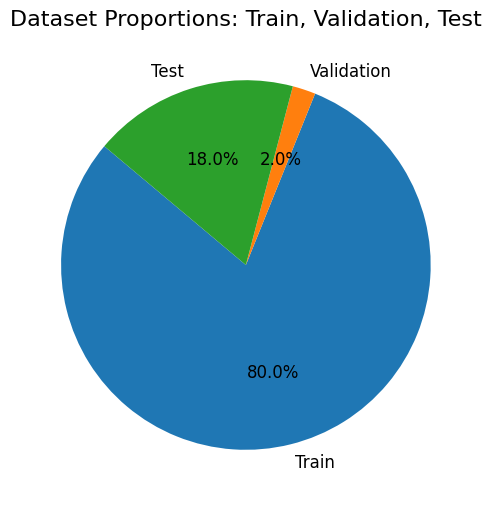

In [16]:
data_labels = ['Train', 'Validation', 'Test']
data_values = [train_total, test_total, val_total]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(data_values, labels=data_labels, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Dataset Proportions: Train, Validation, Test', fontsize=16)
plt.show()

# Re-divide the training set and test set in a ratio of 80% 20%

We found the proportion in each dataset is extremely imbalanced. So we decided to merge them into a big single dataset with changed name and divide the train, test, and valid dataset by ourselves.

In [17]:
import os
import shutil

# find the three datasets
train_dir = '/content/mixed_data/Train'
test_dir = '/content/mixed_data/Test'
val_dir = '/content/mixed_data/Val'

# define the new dictionary
all_data_dir = '/content/all_data/'
os.makedirs(all_data_dir, exist_ok=True)

#define the integrate function
def merge_data(source_dir, target_dir):
    for category in os.listdir(source_dir):
        category_path = os.path.join(source_dir, category)
        target_category_path = os.path.join(target_dir, category)
        os.makedirs(target_category_path, exist_ok=True)
        for file in os.listdir(category_path):
            shutil.move(os.path.join(category_path, file), target_category_path)

# integrate all the three big datasets into one whole dataset
merge_data(train_dir, all_data_dir)
merge_data(test_dir, all_data_dir)
merge_data(val_dir, all_data_dir)

print("All data has been merged into:", all_data_dir)

All data has been merged into: /content/all_data/


Check

In [18]:
print("All Categories:", os.listdir(all_data_dir))

All Categories: ['Corn-Healthy', 'Cherry-Powdery Mildew', 'Cherry-Healthy', 'Strawberry-Healthy', 'Corn-Northern Leaf Blight', 'Grape-Black Rot', 'Bell Pepper-Bacterial Spot', 'Apple-Cedar Apple Rust', 'Apple-Healthy', 'Tomato-Late Blight', 'Tomato-Healthy', 'Potato-Early Blight', 'Tomato-Bacterial Spot', 'Grape-Esca (Black Measles)', 'Strawberry-Leaf Scorch', 'Apple-Black Rot', 'Grape-Healthy', 'Bell Pepper-Healthy', 'Tomato-Yellow Leaf Curl Virus', 'Tomato-Septoria Leaf Spot', 'Corn-Cercospora Leaf Spot', 'Tomato-Early Blight', 'Grape-Leaf Blight', 'Corn-Common Rust', 'Potato-Healthy', 'Peach-Bacterial Spot', 'Potato-Late Blight', 'Peach-Healthy', 'Apple-Apple Scab']


In [19]:
all_classes = len(os.listdir(all_data_dir))

print(f"Number of classes in Train dataset: {all_classes}")

Number of classes in Train dataset: 29


In [20]:
print("All Dataset:")
count_images(all_data_dir)

All Dataset:
Category: Corn-Healthy, Images: 2324
Category: Cherry-Powdery Mildew, Images: 2104
Category: Cherry-Healthy, Images: 2282
Category: Strawberry-Healthy, Images: 2280
Category: Corn-Northern Leaf Blight, Images: 2385
Category: Grape-Black Rot, Images: 2360
Category: Bell Pepper-Bacterial Spot, Images: 2391
Category: Apple-Cedar Apple Rust, Images: 2200
Category: Apple-Healthy, Images: 2510
Category: Tomato-Late Blight, Images: 2314
Category: Tomato-Healthy, Images: 2407
Category: Potato-Early Blight, Images: 2424
Category: Tomato-Bacterial Spot, Images: 2127
Category: Grape-Esca (Black Measles), Images: 2400
Category: Strawberry-Leaf Scorch, Images: 2218
Category: Apple-Black Rot, Images: 2484
Category: Grape-Healthy, Images: 2115
Category: Bell Pepper-Healthy, Images: 2485
Category: Tomato-Yellow Leaf Curl Virus, Images: 2451
Category: Tomato-Septoria Leaf Spot, Images: 2181
Category: Corn-Cercospora Leaf Spot, Images: 2052
Category: Tomato-Early Blight, Images: 2400
Catego

[2324,
 2104,
 2282,
 2280,
 2385,
 2360,
 2391,
 2200,
 2510,
 2314,
 2407,
 2424,
 2127,
 2400,
 2218,
 2484,
 2115,
 2485,
 2451,
 2181,
 2052,
 2400,
 2152,
 2384,
 2280,
 2297,
 2424,
 2160,
 2520]

In [21]:
val_dir = '/content/all_data/'
all_total = count_total_images(all_data_dir)

print(f"Total images in all Dataset: {all_total}")

Total images in all Dataset: 67111


In [22]:
# Define new train and test dictionaries
new_train_dir = '/content/new_data/Train'
new_test_dir = '/content/new_data/Test'
os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(new_test_dir, exist_ok=True)

# define the split function
def split_data(source_dir, train_dir, test_dir, split_ratio):
    for category in os.listdir(source_dir):
        category_path = os.path.join(source_dir, category)
        train_category_path = os.path.join(train_dir, category)
        test_category_path = os.path.join(test_dir, category)
        os.makedirs(train_category_path, exist_ok=True)
        os.makedirs(test_category_path, exist_ok=True)

        files = os.listdir(category_path)
        random.shuffle(files)
        split_point = int(len(files) * split_ratio)

        for file in files[:split_point]:
            shutil.move(os.path.join(category_path, file), train_category_path)

        for file in files[split_point:]:
            shutil.move(os.path.join(category_path, file), test_category_path)


split_data(all_data_dir, new_train_dir, new_test_dir, 0.8)

print("New Train and Test datasets have been created.")


New Train and Test datasets have been created.


check they are indeed 80:20

In [23]:
train_total = count_total_images(new_train_dir)
test_total = count_total_images(new_test_dir)

print(f"Total images in New Train Dataset: {train_total}")
print(f"Total images in New Test Dataset: {test_total}")

Total images in New Train Dataset: 53681
Total images in New Test Dataset: 13430


check the categories in train dataset are balanced.

In [24]:
print("New train Dataset:")
count_images(new_train_dir)

New train Dataset:
Category: Corn-Healthy, Images: 1859
Category: Cherry-Powdery Mildew, Images: 1683
Category: Cherry-Healthy, Images: 1825
Category: Strawberry-Healthy, Images: 1824
Category: Corn-Northern Leaf Blight, Images: 1908
Category: Grape-Black Rot, Images: 1888
Category: Bell Pepper-Bacterial Spot, Images: 1912
Category: Apple-Cedar Apple Rust, Images: 1760
Category: Apple-Healthy, Images: 2008
Category: Tomato-Late Blight, Images: 1851
Category: Tomato-Healthy, Images: 1925
Category: Potato-Early Blight, Images: 1939
Category: Tomato-Bacterial Spot, Images: 1701
Category: Grape-Esca (Black Measles), Images: 1920
Category: Strawberry-Leaf Scorch, Images: 1774
Category: Apple-Black Rot, Images: 1987
Category: Grape-Healthy, Images: 1692
Category: Bell Pepper-Healthy, Images: 1988
Category: Tomato-Yellow Leaf Curl Virus, Images: 1960
Category: Tomato-Septoria Leaf Spot, Images: 1744
Category: Corn-Cercospora Leaf Spot, Images: 1641
Category: Tomato-Early Blight, Images: 1920


[1859,
 1683,
 1825,
 1824,
 1908,
 1888,
 1912,
 1760,
 2008,
 1851,
 1925,
 1939,
 1701,
 1920,
 1774,
 1987,
 1692,
 1988,
 1960,
 1744,
 1641,
 1920,
 1721,
 1907,
 1824,
 1837,
 1939,
 1728,
 2016]

In [25]:
classes = sorted(os.listdir(new_train_dir))  #by alphabet
print("Classes:", classes)

Classes: ['Apple-Apple Scab', 'Apple-Black Rot', 'Apple-Cedar Apple Rust', 'Apple-Healthy', 'Bell Pepper-Bacterial Spot', 'Bell Pepper-Healthy', 'Cherry-Healthy', 'Cherry-Powdery Mildew', 'Corn-Cercospora Leaf Spot', 'Corn-Common Rust', 'Corn-Healthy', 'Corn-Northern Leaf Blight', 'Grape-Black Rot', 'Grape-Esca (Black Measles)', 'Grape-Healthy', 'Grape-Leaf Blight', 'Peach-Bacterial Spot', 'Peach-Healthy', 'Potato-Early Blight', 'Potato-Healthy', 'Potato-Late Blight', 'Strawberry-Healthy', 'Strawberry-Leaf Scorch', 'Tomato-Bacterial Spot', 'Tomato-Early Blight', 'Tomato-Healthy', 'Tomato-Late Blight', 'Tomato-Septoria Leaf Spot', 'Tomato-Yellow Leaf Curl Virus']


Category: Corn-Healthy, Images: 1859
Category: Cherry-Powdery Mildew, Images: 1683
Category: Cherry-Healthy, Images: 1825
Category: Strawberry-Healthy, Images: 1824
Category: Corn-Northern Leaf Blight, Images: 1908
Category: Grape-Black Rot, Images: 1888
Category: Bell Pepper-Bacterial Spot, Images: 1912
Category: Apple-Cedar Apple Rust, Images: 1760
Category: Apple-Healthy, Images: 2008
Category: Tomato-Late Blight, Images: 1851
Category: Tomato-Healthy, Images: 1925
Category: Potato-Early Blight, Images: 1939
Category: Tomato-Bacterial Spot, Images: 1701
Category: Grape-Esca (Black Measles), Images: 1920
Category: Strawberry-Leaf Scorch, Images: 1774
Category: Apple-Black Rot, Images: 1987
Category: Grape-Healthy, Images: 1692
Category: Bell Pepper-Healthy, Images: 1988
Category: Tomato-Yellow Leaf Curl Virus, Images: 1960
Category: Tomato-Septoria Leaf Spot, Images: 1744
Category: Corn-Cercospora Leaf Spot, Images: 1641
Category: Tomato-Early Blight, Images: 1920
Category: Grape-Lea

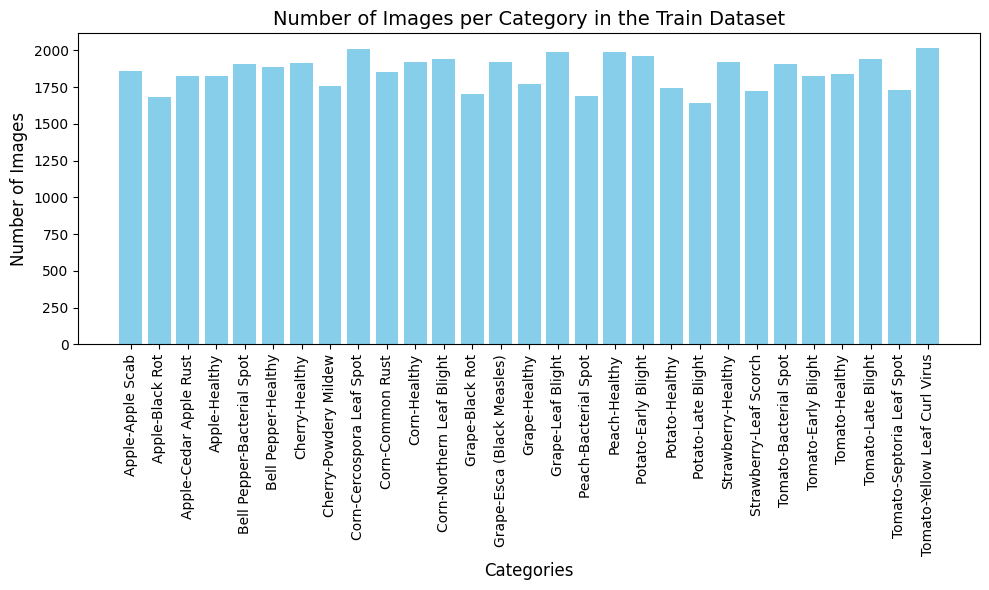

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(classes, count_images(new_train_dir), color='skyblue')
plt.xticks(rotation=90, fontsize=10)
plt.ylabel('Number of Images', fontsize=12)
plt.xlabel('Categories', fontsize=12)
plt.title('Number of Images per Category in the Train Dataset', fontsize=14)
plt.tight_layout()
plt.show()

# Data transformation and create the dataloaders

But since we have different kinds of models, which require different formats of image data size and different normalization, so we define different dataloaders.

### Based on different model requirements to set different data transformation

In [27]:
cnn_train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

cnn_test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])


pretrained_train_transform = transforms.Compose([
    transforms.Resize((224, 224)),   #Required size for VGG model
    transforms.ToTensor(),           #And final we remove any image augmentation since it will negatively affect the model accuracy
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

pretrained_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

### Build dataloaders for CNN and pretrained VGG model

In [28]:
# Load datasets for CNN model
cnn_train_data = datasets.ImageFolder(new_train_dir, transform=cnn_train_transform)
cnn_test_data = datasets.ImageFolder(new_test_dir, transform=cnn_test_transform)

# Load datasets for pretrained model
pretrained_train_data = datasets.ImageFolder(new_train_dir, transform=pretrained_train_transform)
pretrained_test_data = datasets.ImageFolder(new_test_dir, transform=pretrained_test_transform)

# create data loaders for test data
cnn_test_loader = DataLoader(cnn_test_data, batch_size=64, num_workers=2, shuffle=True)

pretrained_test_loader = DataLoader(pretrained_test_data, batch_size=64, num_workers=2, shuffle=True)

Split train dataset into train-train and train-valid dataset

In [29]:
np.random.seed(42)


cnn_dataset_size = len(cnn_train_data)
pretrained_dataset_size = len(pretrained_train_data)

# create index and shuffle it
cnn_indices = list(range(cnn_dataset_size))
np.random.shuffle(cnn_indices)
pretrained_indices = list(range(pretrained_dataset_size))
np.random.shuffle(pretrained_indices)

# split train and valid datasets as 70: 30
cnn_split = int(np.floor(0.7 * cnn_dataset_size))
cnn_train_indices, cnn_valid_indices = cnn_indices[:cnn_split], cnn_indices[cnn_split:]

pretrained_split = int(np.floor(0.7 * pretrained_dataset_size))
pretrained_train_indices, pretrained_valid_indices = pretrained_indices[:pretrained_split], pretrained_indices[pretrained_split:]

cnn_train_sampler = SubsetRandomSampler(cnn_train_indices)
cnn_valid_sampler = SubsetRandomSampler(cnn_valid_indices)

pretrained_train_sampler = SubsetRandomSampler(pretrained_train_indices)
pretrained_valid_sampler = SubsetRandomSampler(pretrained_valid_indices)

# create dataloaders
cnn_train_loader = DataLoader(cnn_train_data, batch_size=64, sampler=cnn_train_sampler, num_workers=2, shuffle=False, drop_last=True)
cnn_valid_loader = DataLoader(cnn_train_data, batch_size=64, sampler=cnn_valid_sampler, num_workers=2, shuffle=False, drop_last=True)

pretrained_train_loader = DataLoader(pretrained_train_data, batch_size=128, sampler=pretrained_train_sampler, num_workers=2, shuffle=False, drop_last=True)
pretrained_valid_loader = DataLoader(pretrained_train_data, batch_size=128, sampler=pretrained_valid_sampler, num_workers=2, shuffle=False, drop_last=True)

# check
print(f"train datasize: {len(cnn_train_indices)}")
print(f"valid datasize: {len(cnn_valid_indices)}")

print(f"train datasize: {len(pretrained_train_indices)}")
print(f"valid datasize: {len(pretrained_valid_indices)}")

train datasize: 37576
valid datasize: 16105
train datasize: 37576
valid datasize: 16105


### Visualize a Batch of Training Data

#### Visualization of data for CNN model

In [30]:
def imshow_cnn(img):
    img = img.cpu().numpy()
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))

In [31]:
# obtain one batch of training images
cnn_dataiter = iter(cnn_train_loader)
cnn_images, cnn_labels = next(cnn_dataiter)
cnn_images.shape

torch.Size([64, 3, 64, 64])

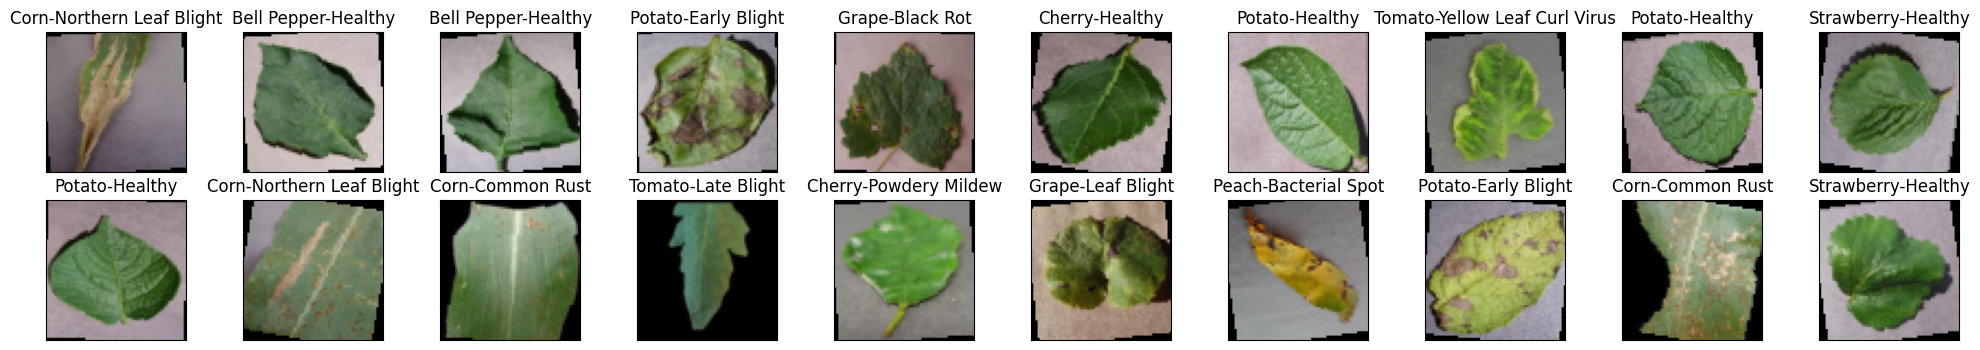

In [32]:
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow_cnn(cnn_images[idx])
    ax.set_title(classes[cnn_labels[idx]])

#### Visualization of data for pretrained VGG model

In [33]:
def imshow_vgg(img, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)):
    img = img.cpu().numpy().transpose((1, 2, 0))
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)

In [34]:
# obtain one batch of training images
pretrained_dataiter = iter(pretrained_train_loader)
pretrained_images, pretrained_labels = next(pretrained_dataiter)
pretrained_images.shape

torch.Size([128, 3, 224, 224])

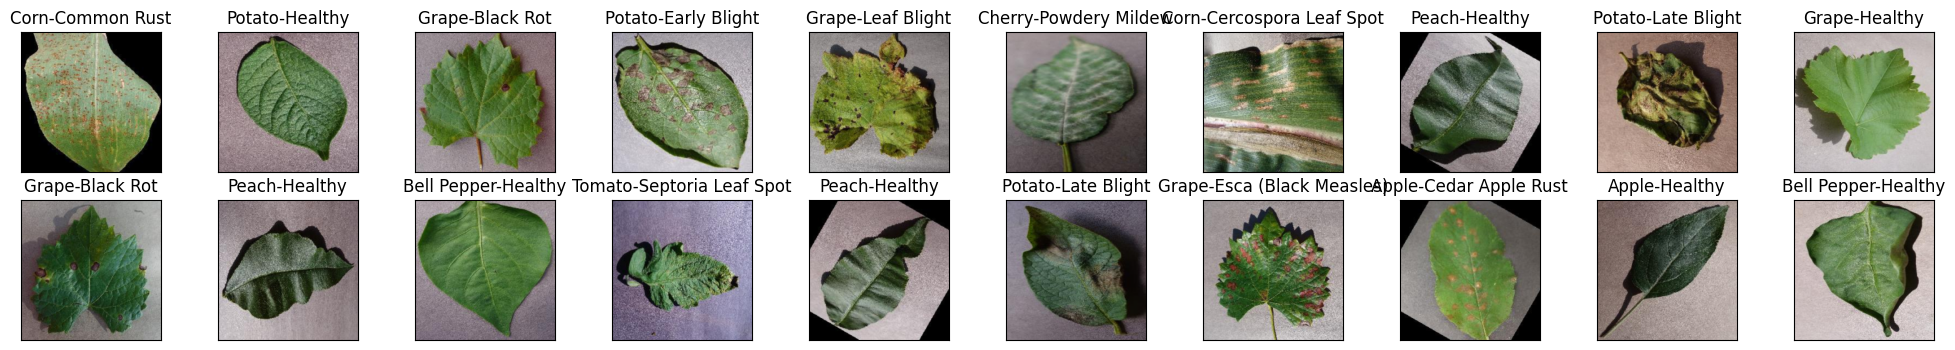

In [35]:
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow_vgg(pretrained_images[idx])
    ax.set_title(classes[pretrained_labels[idx]])

# Define the CNN Architecture

### Train CNN Model

1. Create CNN architecture

In [36]:
# Define CNN model
class CNN_Net(nn.Module):
    def __init__(self):
        super(CNN_Net, self).__init__()
        # First convolution layer (input channels 3, output channels 8, kernel 3x3)
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        # Second convolution layer (input channels 8, output channels 16, kernel 3x3)
        self.conv2 = nn.Conv2d(8, 16, 3, padding=1)
        # Third convolution layer (input channels 16, output channels 32, kernel 3x3)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        # Fourth convolution layer (input channels 32, output channels 64, kernel 3x3)
        self.conv4 = nn.Conv2d(32, 64, 3, padding=1)
        # Max pooling (2x2)
        self.pool = nn.MaxPool2d(2, 2)
        # Fully connected layer (project 64 * 4 * 4 into 500)
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        # Fully connected layer (project 500 into 29 classes)
        self.fc2 = nn.Linear(500, 29)
        # dropout layer (p=0.15)
        self.dropout = nn.Dropout(0.15)

    def forward(self, x):
        # Apply convolutional layers with ReLU activation and pooling
        x = self.pool(F.relu(self.conv1(x)))  # Output: 32x32x8
        x = self.pool(F.relu(self.conv2(x)))  # Output: 16x16x16
        x = self.pool(F.relu(self.conv3(x)))  # Output: 8x8x32
        x = self.pool(F.relu(self.conv4(x)))  # Output: 4x4x64
        # Flatten the tensor into a vector
        x = x.view(-1, 64 * 4 * 4)
        # add dropout layer
        x = self.dropout(x)
        # Apply first fully connected layers
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        #Apply second fully connected layers
        x = self.fc2(x)
        return x


cnn_model = CNN_Net()

# Print the model structure for verification
print(cnn_model)

CNN_Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=29, bias=True)
  (dropout): Dropout(p=0.15, inplace=False)
)


In [37]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cnn_model = cnn_model.to(device)

In [38]:
print(next(cnn_model.parameters()).device)

cuda:0


2. Check the model is working using one batch

In [39]:
# obtain one batch of training images
cnn_dataiter = iter(cnn_train_loader)
cnn_images, cnn_labels = next(cnn_dataiter)
cnn_images = cnn_images.to(device)
cnn_labels = cnn_labels.to(device)
cnn_output=cnn_model(cnn_images)
cnn_output.shape,cnn_labels.shape

(torch.Size([64, 29]), torch.Size([64]))

In [40]:
_, preds = torch.max(cnn_output, 1)  # get the predicted classes
print("Predicted classes:", preds[:5])
print("Actual labels:", cnn_labels[:5])

Predicted classes: tensor([11, 27, 12, 11, 28], device='cuda:0')
Actual labels: tensor([ 7, 24,  6, 20, 21], device='cuda:0')


3. Define loss function

In [41]:
# specify loss function (categorical cross-entropy)
cnn_criterion = nn.CrossEntropyLoss()

# specify optimizer
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

4. Train the model

In [42]:
n_epochs = 40
valid_loss_min = np.Inf

train_losses = []  # List to store training loss for each epoch
valid_losses = []  # List to store validation loss for each epoch


for epoch in range(1, n_epochs + 1):

    train_loss = 0.0
    valid_loss = 0.0

    ###################
    # train the model #
    ###################
    cnn_model.train()
    for data, target in cnn_train_loader:

        data = data.to(device)
        target = target.to(device)

        cnn_optimizer.zero_grad()

        cnn_output = cnn_model(data)

        cnn_loss = cnn_criterion(cnn_output, target)

        cnn_loss.backward()

        cnn_optimizer.step()

        train_loss += cnn_loss.item() * data.size(0)

    ######################
    # validate the model #
    ######################
    cnn_model.eval()
    with torch.no_grad():

        for data, target in cnn_valid_loader:

            data = data.to(device)
            target = target.to(device)

            cnn_output = cnn_model(data)

            cnn_loss = cnn_criterion(cnn_output, target)

            valid_loss += cnn_loss.item() * data.size(0)


    train_loss = train_loss / len(cnn_train_loader.sampler)
    valid_loss = valid_loss / len(cnn_valid_loader.sampler)

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)


    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
        torch.save(cnn_model.state_dict(), 'cnn_model_plant_disease.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 1.741104 	Validation Loss: 0.957298
Validation loss decreased (inf --> 0.957298).  Saving model ...
Epoch: 2 	Training Loss: 0.833732 	Validation Loss: 0.551543
Validation loss decreased (0.957298 --> 0.551543).  Saving model ...
Epoch: 3 	Training Loss: 0.566028 	Validation Loss: 0.410855
Validation loss decreased (0.551543 --> 0.410855).  Saving model ...
Epoch: 4 	Training Loss: 0.445704 	Validation Loss: 0.390499
Validation loss decreased (0.410855 --> 0.390499).  Saving model ...
Epoch: 5 	Training Loss: 0.365965 	Validation Loss: 0.274034
Validation loss decreased (0.390499 --> 0.274034).  Saving model ...
Epoch: 6 	Training Loss: 0.313850 	Validation Loss: 0.265505
Validation loss decreased (0.274034 --> 0.265505).  Saving model ...
Epoch: 7 	Training Loss: 0.275414 	Validation Loss: 0.218939
Validation loss decreased (0.265505 --> 0.218939).  Saving model ...
Epoch: 8 	Training Loss: 0.242473 	Validation Loss: 0.194715
Validation loss decreased (0.21893

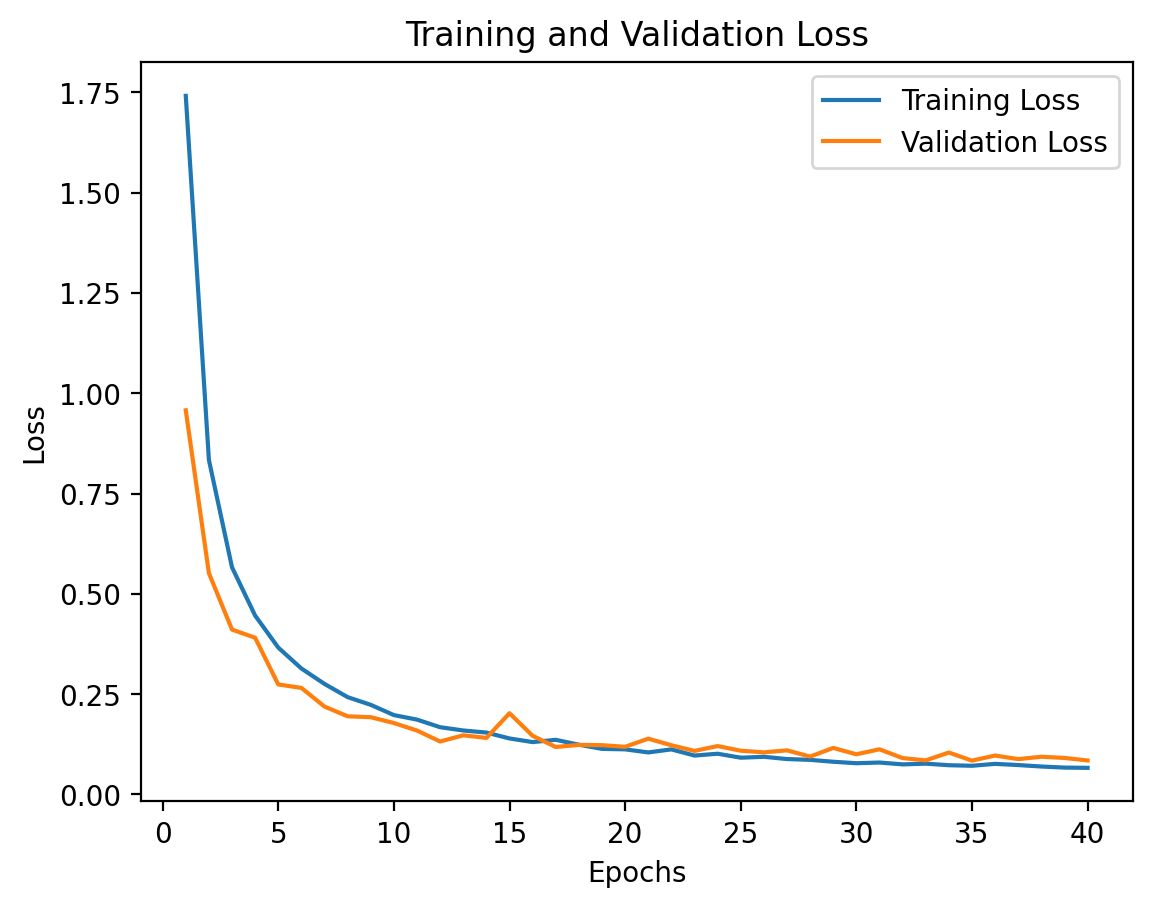

In [43]:
%config InlineBackend.figure_format = 'retina'

plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Load the best model and test

In [44]:
cnn_model.load_state_dict(torch.load('cnn_model_plant_disease.pt'))

<ipython-input-44-adafb1dc3ce1>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cnn_model.load_state_dict(torch.load('cnn_model_plant_disease.pt'))


<All keys matched successfully>

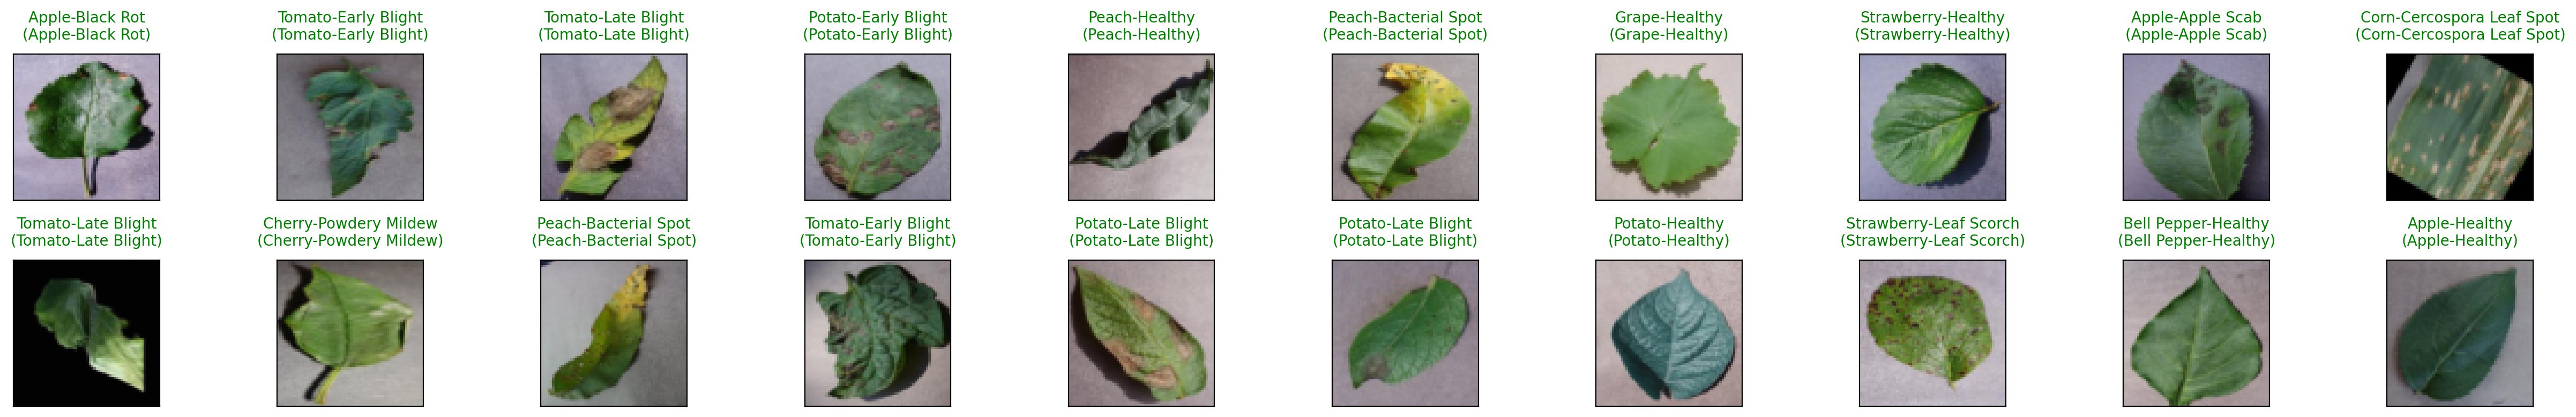

In [45]:
# obtain one batch of test images
cnn_test_dataiter = iter(cnn_test_loader)
images, labels = next(cnn_test_dataiter)
images.numpy()
images = images.to(device)

# get sample outputs
output = cnn_model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow_cnn(images[idx])

    ax.set_title("{}\n({})".format(
        classes[preds[idx]], classes[labels[idx]]),
        color=("green" if preds[idx] == labels[idx].item() else "red"),
        fontsize=10, pad=10)
plt.tight_layout()
plt.show()

In [46]:
# Track test loss
test_loss = 0.0
class_correct = list(0. for i in range(29))
class_total = list(0. for i in range(29))

size = len(cnn_test_loader.dataset)
predictions = np.zeros(size)
all_classes = np.zeros(size)
all_proba = np.zeros((size, 29))
idx = 0

cnn_model.eval()

# Iterate over test data
for data, target in cnn_test_loader:

    data, target = data.to(device), target.to(device)

    output = cnn_model(data)

    loss = cnn_criterion(output, target)

    test_loss += loss.item() * data.size(0)

    # Convert output probabilities to predicted class
    _, pred = torch.max(output, 1)

    # Compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.cpu().numpy())

    predictions[idx:idx + len(target)] = pred.cpu().numpy()
    all_classes[idx:idx + len(target)] = target.cpu().numpy()
    all_proba[idx:idx + len(target), :] = output.cpu().detach().numpy()
    idx += len(target)

    # Calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i].item()
        class_correct[label] += correct[i]
        class_total[label] += 1

# Calculate average test loss
test_loss = test_loss / len(cnn_test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

# Print test accuracy for each class
for i in range(29):
    if class_total[i] > 0:
        print('CNN Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            int(class_correct[i]), int(class_total[i])))
    else:
        print('CNN Test Accuracy of %5s: N/A (no test examples)' % (classes[i]))

# Print overall test accuracy
print('\nCNN Test Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    int(np.sum(class_correct)), int(np.sum(class_total))))

CNN_total = class_total
print(CNN_total)

Test Loss: 0.080682

CNN Test Accuracy of Apple-Apple Scab: 96% (488/504)
CNN Test Accuracy of Apple-Black Rot: 98% (490/497)
CNN Test Accuracy of Apple-Cedar Apple Rust: 98% (434/440)
CNN Test Accuracy of Apple-Healthy: 94% (472/502)
CNN Test Accuracy of Bell Pepper-Bacterial Spot: 98% (472/479)
CNN Test Accuracy of Bell Pepper-Healthy: 95% (474/497)
CNN Test Accuracy of Cherry-Healthy: 99% (455/457)
CNN Test Accuracy of Cherry-Powdery Mildew: 98% (416/421)
CNN Test Accuracy of Corn-Cercospora Leaf Spot: 92% (379/411)
CNN Test Accuracy of Corn-Common Rust: 99% (473/477)
CNN Test Accuracy of Corn-Healthy: 100% (465/465)
CNN Test Accuracy of Corn-Northern Leaf Blight: 99% (473/477)
CNN Test Accuracy of Grape-Black Rot: 99% (469/472)
CNN Test Accuracy of Grape-Esca (Black Measles): 96% (461/480)
CNN Test Accuracy of Grape-Healthy: 99% (421/423)
CNN Test Accuracy of Grape-Leaf Blight: 98% (426/431)
CNN Test Accuracy of Peach-Bacterial Spot: 98% (451/460)
CNN Test Accuracy of Peach-Healthy

# Confusion matrix
To see the performance of the algorithm per class

In [47]:
def make_fig_cm(cm):
    fig = plt.figure(figsize=(11,11))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    tick_marks = np.arange(len(classes));
    plt.xticks(tick_marks, classes, rotation=90);
    plt.yticks(tick_marks, classes, rotation=0);
    plt.tight_layout();
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        coeff = f'{cm[i, j]}'
        plt.text(j, i, coeff, horizontalalignment="center", verticalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual');
    plt.xlabel('Predicted');

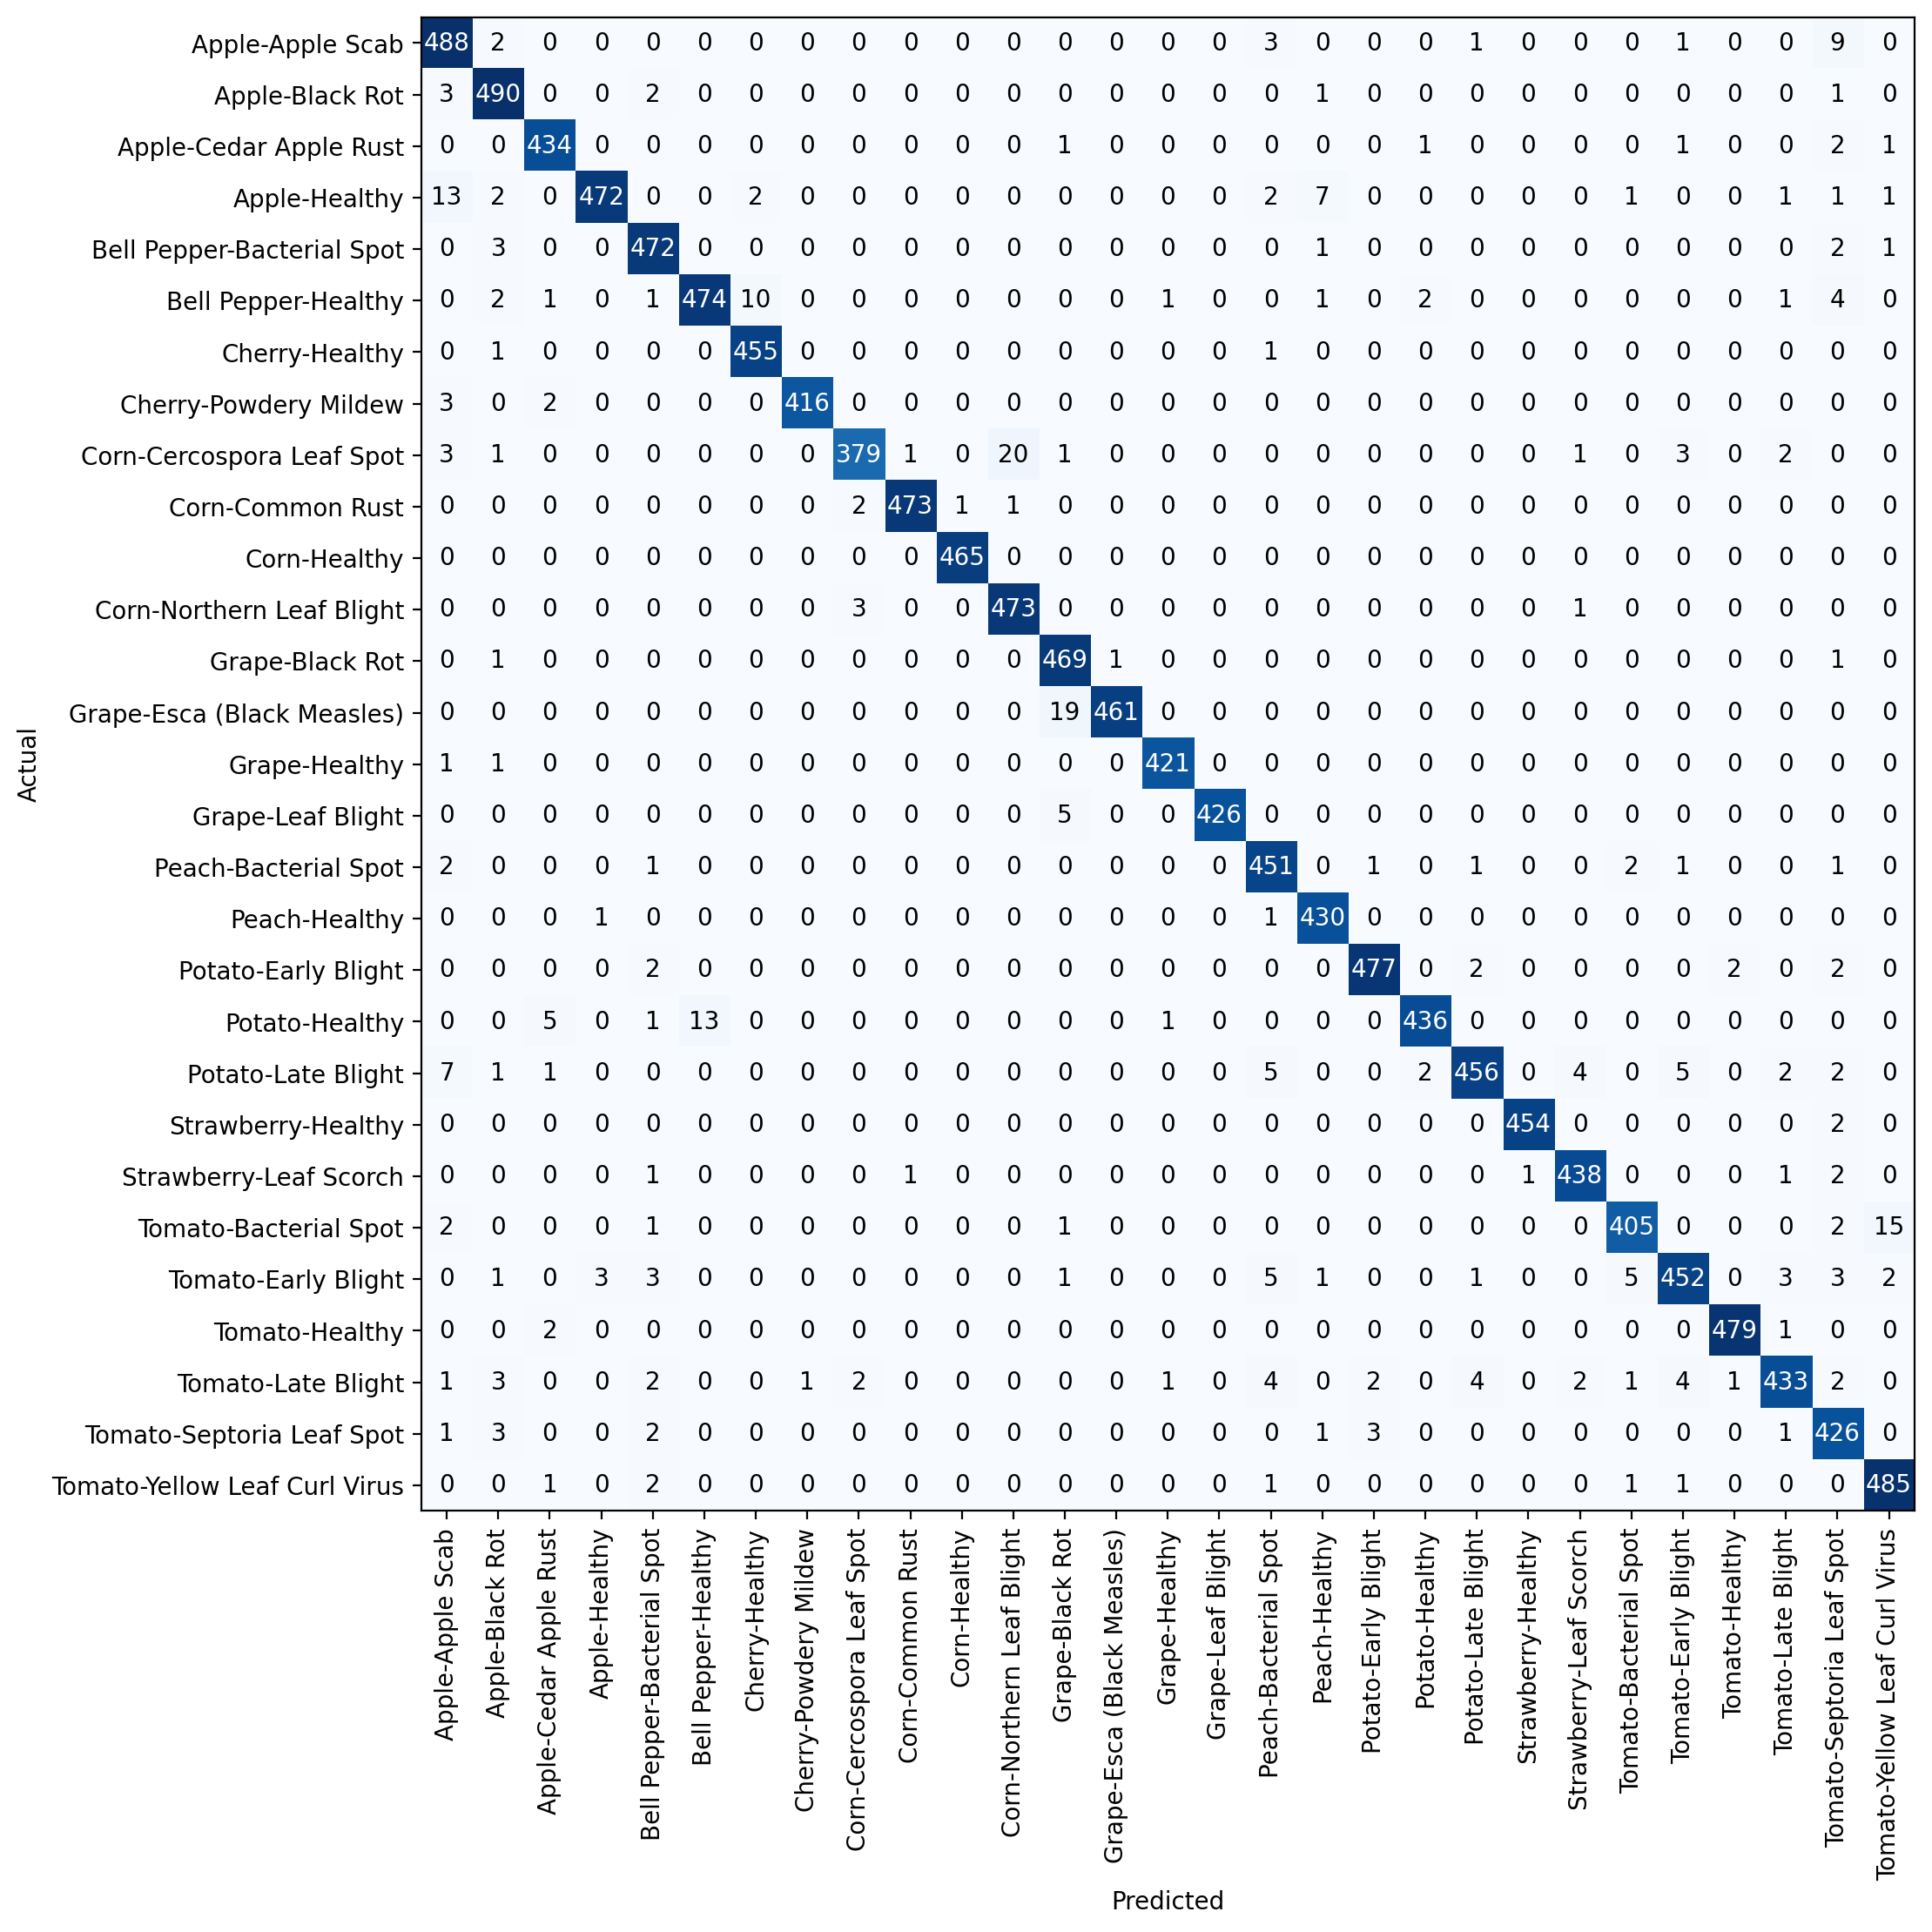

In [48]:
cnn_cm = confusion_matrix(all_classes,predictions)
make_fig_cm(cnn_cm)

# Pretrained-VGG model Architecture

1. load the initial VGG16 structure

In [66]:
vgg_model = models.vgg16(weights='DEFAULT')

2. Change the last layer

In [67]:
for param in vgg_model.parameters():
    param.requires_grad = False
vgg_model.classifier[2] = nn.Dropout(p=0.2, inplace=True)
vgg_model.classifier[5] = nn.Dropout(p=0.3, inplace=True)
vgg_model.classifier._modules['6'] = nn.Linear(4096, 29)
vgg_model.classifier._modules['7'] = torch.nn.LogSoftmax(dim = 1)

In [68]:
print(vgg_model.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.2, inplace=True)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.3, inplace=True)
  (6): Linear(in_features=4096, out_features=29, bias=True)
  (7): LogSoftmax(dim=1)
)


In [69]:
vgg_model = vgg_model.to(device)

3. Set the loss function and optimizer

In [70]:
vgg_criterion = nn.NLLLoss()
vgg_optimizer = torch.optim.Adam(vgg_model.classifier[6].parameters(),lr = 0.001)

4. We can pre compute the feature extraction layers for our datasets to save time

In [54]:
import time
def preconvfeat(dataloader):
    conv_features = []
    labels_list = []
    start_time = time.time()
    total_batches = len(dataloader)
    for batch_idx, data in enumerate(dataloader):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        x = vgg_model.features(inputs)
        conv_features.extend(x.data.cpu().numpy())
        labels_list.extend(labels.data.cpu().numpy())

        if (batch_idx + 1) % 10 == 0 or (batch_idx + 1) == total_batches:
            elapsed_time = time.time() - start_time
            print(f"Processed {batch_idx + 1}/{total_batches} batches. "
                  f"Elapsed time: {elapsed_time:.2f} seconds.")

    conv_features = np.concatenate([[feat] for feat in conv_features])
    return (conv_features, labels_list)

In [55]:
conv_feat_train,labels_train = preconvfeat(pretrained_train_loader)

Processed 10/293 batches. Elapsed time: 4.07 seconds.
Processed 20/293 batches. Elapsed time: 7.56 seconds.
Processed 30/293 batches. Elapsed time: 11.07 seconds.
Processed 40/293 batches. Elapsed time: 14.57 seconds.
Processed 50/293 batches. Elapsed time: 18.07 seconds.
Processed 60/293 batches. Elapsed time: 21.58 seconds.
Processed 70/293 batches. Elapsed time: 25.08 seconds.
Processed 80/293 batches. Elapsed time: 28.57 seconds.
Processed 90/293 batches. Elapsed time: 32.06 seconds.
Processed 100/293 batches. Elapsed time: 35.54 seconds.
Processed 110/293 batches. Elapsed time: 39.02 seconds.
Processed 120/293 batches. Elapsed time: 42.50 seconds.
Processed 130/293 batches. Elapsed time: 45.98 seconds.
Processed 140/293 batches. Elapsed time: 49.47 seconds.
Processed 150/293 batches. Elapsed time: 52.94 seconds.
Processed 160/293 batches. Elapsed time: 56.40 seconds.
Processed 170/293 batches. Elapsed time: 59.87 seconds.
Processed 180/293 batches. Elapsed time: 63.33 seconds.
Pro

In [56]:
conv_feat_valid,labels_valid = preconvfeat(pretrained_valid_loader)

Processed 10/125 batches. Elapsed time: 4.20 seconds.
Processed 20/125 batches. Elapsed time: 7.72 seconds.
Processed 30/125 batches. Elapsed time: 11.25 seconds.
Processed 40/125 batches. Elapsed time: 14.78 seconds.
Processed 50/125 batches. Elapsed time: 18.31 seconds.
Processed 60/125 batches. Elapsed time: 21.85 seconds.
Processed 70/125 batches. Elapsed time: 25.38 seconds.
Processed 80/125 batches. Elapsed time: 28.91 seconds.
Processed 90/125 batches. Elapsed time: 32.45 seconds.
Processed 100/125 batches. Elapsed time: 35.97 seconds.
Processed 110/125 batches. Elapsed time: 39.47 seconds.
Processed 120/125 batches. Elapsed time: 43.00 seconds.
Processed 125/125 batches. Elapsed time: 44.76 seconds.


In [57]:
dtype=torch.float
datasetfeat_train = [[torch.from_numpy(f).type(dtype),torch.tensor(l).type(torch.long)] for (f,l) in zip(conv_feat_train,labels_train)]
datasetfeat_train = [(inputs.reshape(-1), classes) for [inputs,classes] in datasetfeat_train]
loaderfeat_train = torch.utils.data.DataLoader(datasetfeat_train, batch_size=128, shuffle=True)

In [58]:
datasetfeat_valid = [[torch.from_numpy(f).type(dtype),torch.tensor(l).type(torch.long)] for (f,l) in zip(conv_feat_valid,labels_valid)]
datasetfeat_valid = [(inputs.reshape(-1), classes) for [inputs,classes] in datasetfeat_valid]
loaderfeat_valid = torch.utils.data.DataLoader(datasetfeat_valid, batch_size=128, shuffle=False)

5. Optimization the last classifier layer

In [71]:
n_epochs = 40
valid_loss_min = np.Inf

train_losses = []
valid_losses = []


for epoch in range(1, n_epochs + 1):

    train_loss = 0.0
    valid_loss = 0.0

    ###################
    # Train the model #
    ###################
    vgg_model.classifier.train()

    for data, target in loaderfeat_train:

        data, target = data.to(device), target.to(device)

        vgg_optimizer.zero_grad()

        vgg_output = vgg_model.classifier(data)

        vgg_loss = vgg_criterion(vgg_output, target)

        vgg_loss.backward()

        vgg_optimizer.step()

        train_loss += vgg_loss.item() * data.size(0)

    ######################
    # Validate the model #
    ######################
    vgg_model.eval()

    with torch.no_grad():
        for data, target in loaderfeat_valid:

            data, target = data.to(device), target.to(device)

            vgg_output = vgg_model.classifier(data)

            vgg_loss = vgg_criterion(vgg_output, target)

            valid_loss += vgg_loss.item() * data.size(0)

    # Compute average losses for the epoch
    train_loss = train_loss / len(pretrained_train_loader.sampler)
    valid_loss = valid_loss / len(pretrained_valid_loader.sampler)

    # Append losses to the lists for future plotting
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    # Print epoch statistics
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))


    # Save the model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
        torch.save(vgg_model.state_dict(), 'vgg_model_plant_disease.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.540408 	Validation Loss: 0.258289
Validation loss decreased (inf --> 0.258289).  Saving model ...
Epoch: 2 	Training Loss: 0.243958 	Validation Loss: 0.206552
Validation loss decreased (0.258289 --> 0.206552).  Saving model ...
Epoch: 3 	Training Loss: 0.194858 	Validation Loss: 0.177563
Validation loss decreased (0.206552 --> 0.177563).  Saving model ...
Epoch: 4 	Training Loss: 0.168087 	Validation Loss: 0.156707
Validation loss decreased (0.177563 --> 0.156707).  Saving model ...
Epoch: 5 	Training Loss: 0.150443 	Validation Loss: 0.156573
Validation loss decreased (0.156707 --> 0.156573).  Saving model ...
Epoch: 6 	Training Loss: 0.141263 	Validation Loss: 0.133887
Validation loss decreased (0.156573 --> 0.133887).  Saving model ...
Epoch: 7 	Training Loss: 0.130401 	Validation Loss: 0.139898
Epoch: 8 	Training Loss: 0.120491 	Validation Loss: 0.132924
Validation loss decreased (0.133887 --> 0.132924).  Saving model ...
Epoch: 9 	Training Loss: 0.115261 

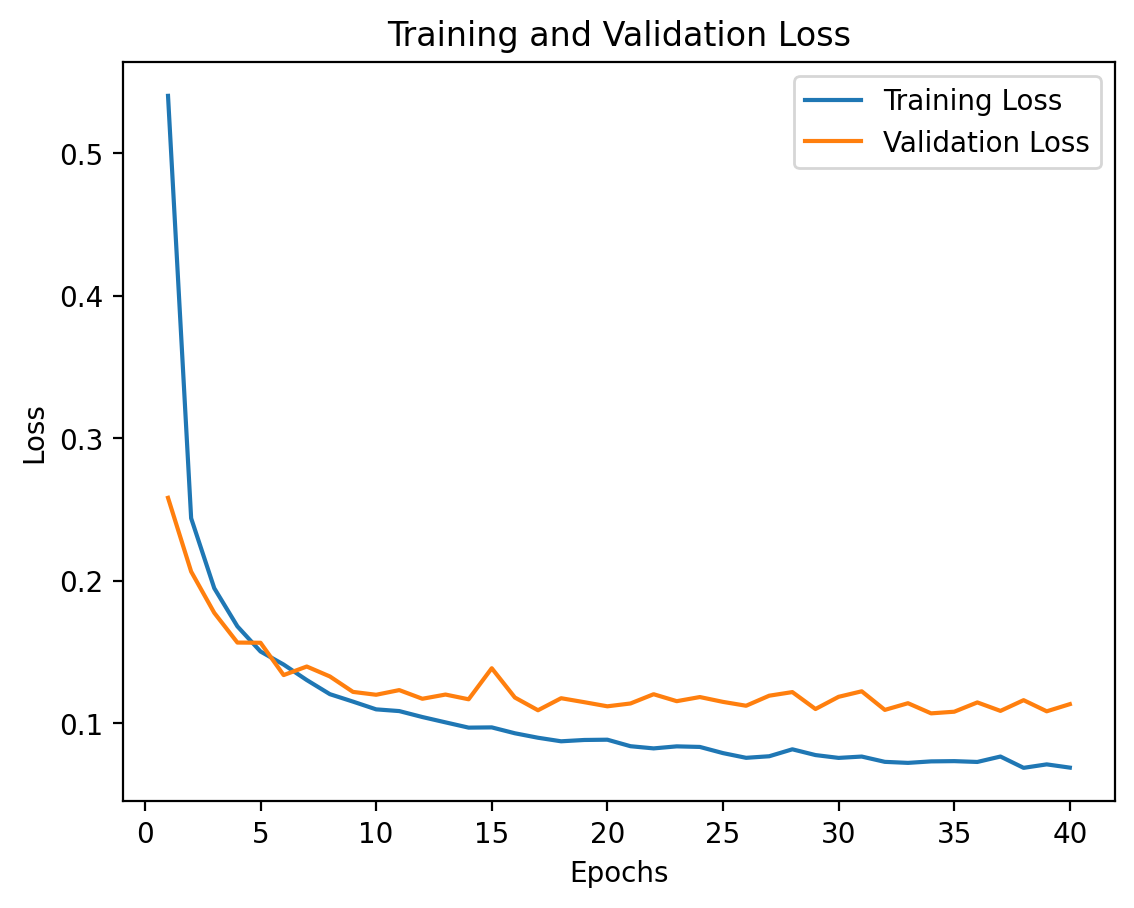

In [72]:
%config InlineBackend.figure_format = 'retina'

plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Load the best VGG model and test

In [73]:
vgg_model.load_state_dict(torch.load('vgg_model_plant_disease.pt'))

<ipython-input-73-cc89a6e9e680>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vgg_model.load_state_dict(torch.load('vgg_model_plant_disease.pt'))


<All keys matched successfully>

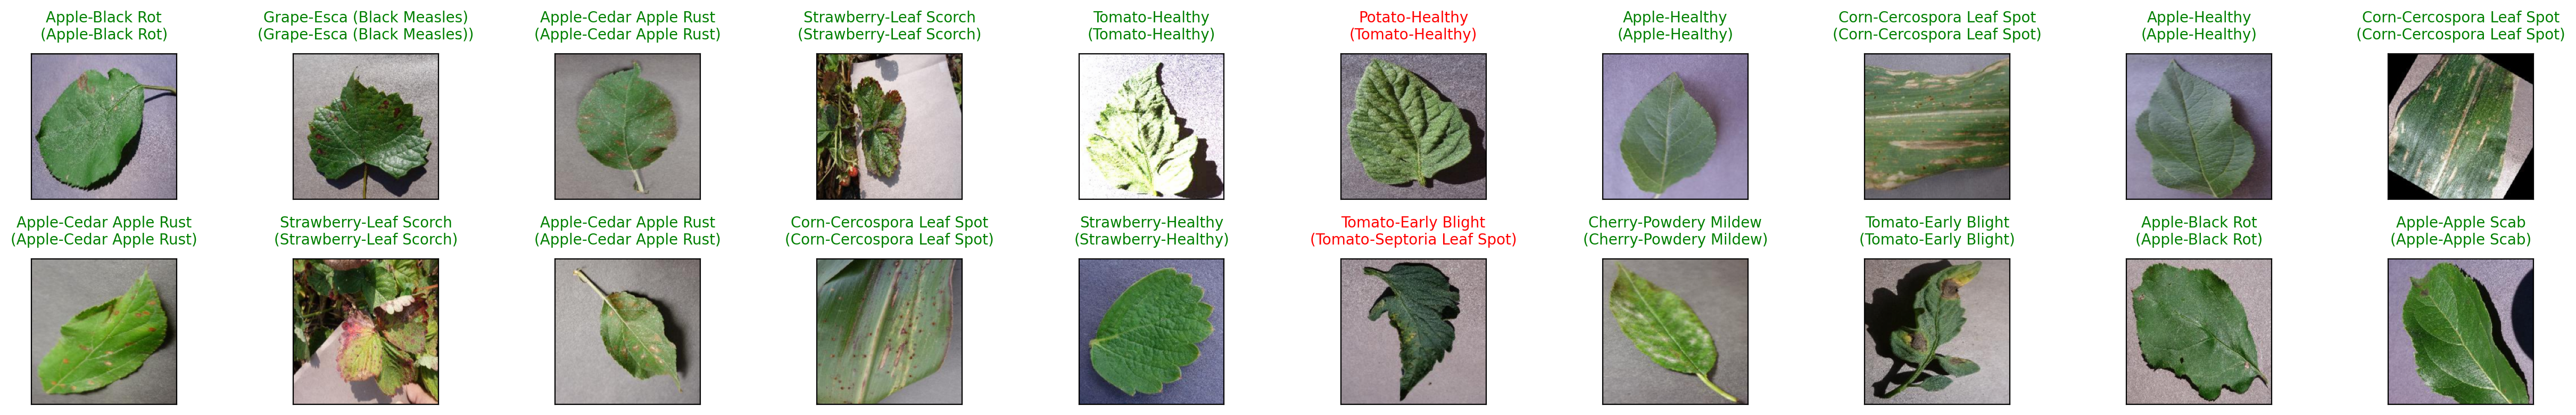

In [74]:
# obtain one batch of test images
vgg_test_dataiter = iter(pretrained_test_loader) # Use the original test loader
images, labels = next(vgg_test_dataiter)
images.numpy()
images = images.to(device)

# get sample outputs
output = vgg_model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow_vgg(images[idx])

    ax.set_title("{}\n({})".format(
        classes[preds[idx]], classes[labels[idx]]),
        color=("green" if preds[idx] == labels[idx].item() else "red"),
        fontsize=10, pad=10)
plt.tight_layout()
plt.show()

In [75]:
# Track test loss
test_loss = 0.0
class_correct = list(0. for i in range(29))
class_total = list(0. for i in range(29))

size = len(pretrained_test_loader.dataset)
predictions = np.zeros(size)
all_classes = np.zeros(size)
all_proba = np.zeros((size, 29))
idx = 0

vgg_model.eval()

# Iterate over test data
for data, target in pretrained_test_loader:

    data, target = data.to(device), target.to(device)

    output = vgg_model(data)

    loss = vgg_criterion(output, target)

    test_loss += loss.item() * data.size(0)

    # Convert output probabilities to predicted class
    _, pred = torch.max(output, 1)

    # Compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.cpu().numpy())

    predictions[idx:idx + len(target)] = pred.cpu().numpy()
    all_classes[idx:idx + len(target)] = target.cpu().numpy()
    all_proba[idx:idx + len(target), :] = output.cpu().detach().numpy()
    idx += len(target)

    # Calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i].item()
        class_correct[label] += correct[i]
        class_total[label] += 1

# Calculate average test loss
test_loss = test_loss / len(pretrained_test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

# Print test accuracy for each class
for i in range(29):
    if class_total[i] > 0:
        print('VGG Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            int(class_correct[i]), int(class_total[i])))
    else:
        print('VGG Test Accuracy of %5s: N/A (no test examples)' % (classes[i]))

# Print overall test accuracy
print('\nVGG Test Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    int(np.sum(class_correct)), int(np.sum(class_total))))

VGG_total = class_total
print(VGG_total)

Test Loss: 0.094432

VGG Test Accuracy of Apple-Apple Scab: 93% (473/504)
VGG Test Accuracy of Apple-Black Rot: 98% (491/497)
VGG Test Accuracy of Apple-Cedar Apple Rust: 97% (430/440)
VGG Test Accuracy of Apple-Healthy: 98% (495/502)
VGG Test Accuracy of Bell Pepper-Bacterial Spot: 96% (461/479)
VGG Test Accuracy of Bell Pepper-Healthy: 98% (490/497)
VGG Test Accuracy of Cherry-Healthy: 98% (450/457)
VGG Test Accuracy of Cherry-Powdery Mildew: 99% (417/421)
VGG Test Accuracy of Corn-Cercospora Leaf Spot: 92% (381/411)
VGG Test Accuracy of Corn-Common Rust: 99% (474/477)
VGG Test Accuracy of Corn-Healthy: 100% (465/465)
VGG Test Accuracy of Corn-Northern Leaf Blight: 96% (462/477)
VGG Test Accuracy of Grape-Black Rot: 97% (462/472)
VGG Test Accuracy of Grape-Esca (Black Measles): 96% (463/480)
VGG Test Accuracy of Grape-Healthy: 98% (416/423)
VGG Test Accuracy of Grape-Leaf Blight: 99% (428/431)
VGG Test Accuracy of Peach-Bacterial Spot: 96% (446/460)
VGG Test Accuracy of Peach-Healthy

#Confusion matrix

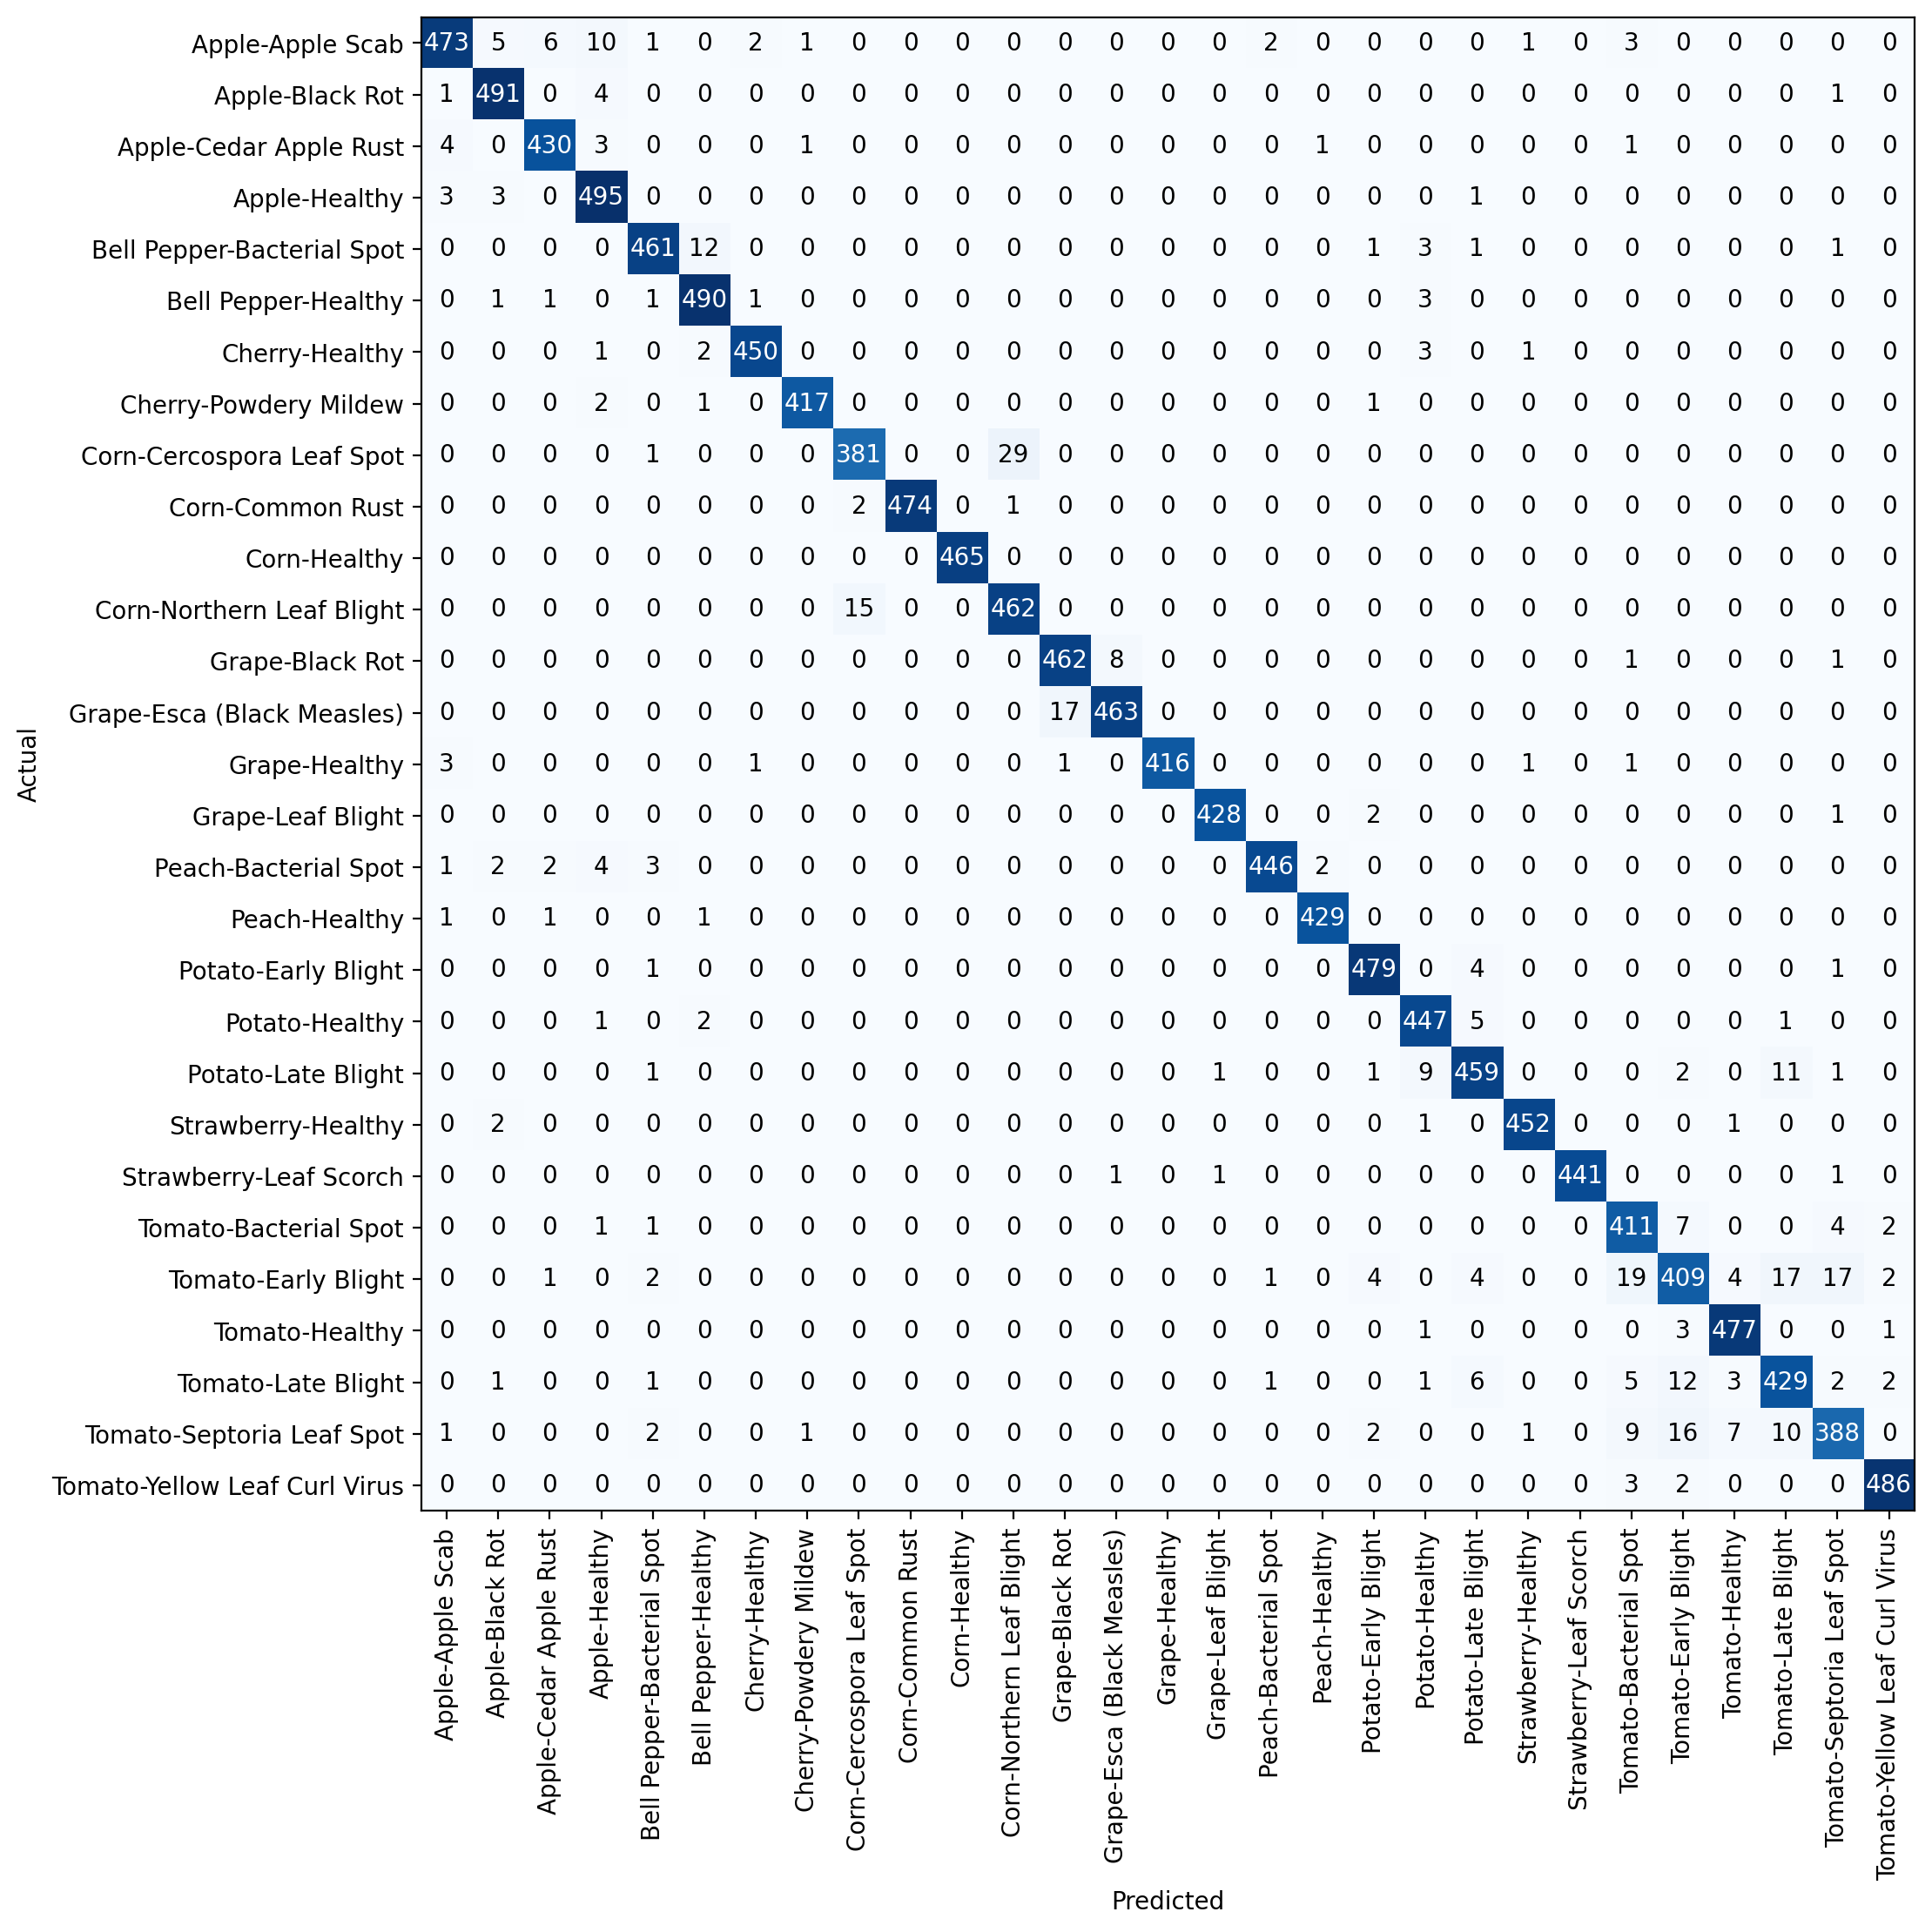

In [76]:
vgg_cm = confusion_matrix(all_classes,predictions)
make_fig_cm(vgg_cm)

#Comparison

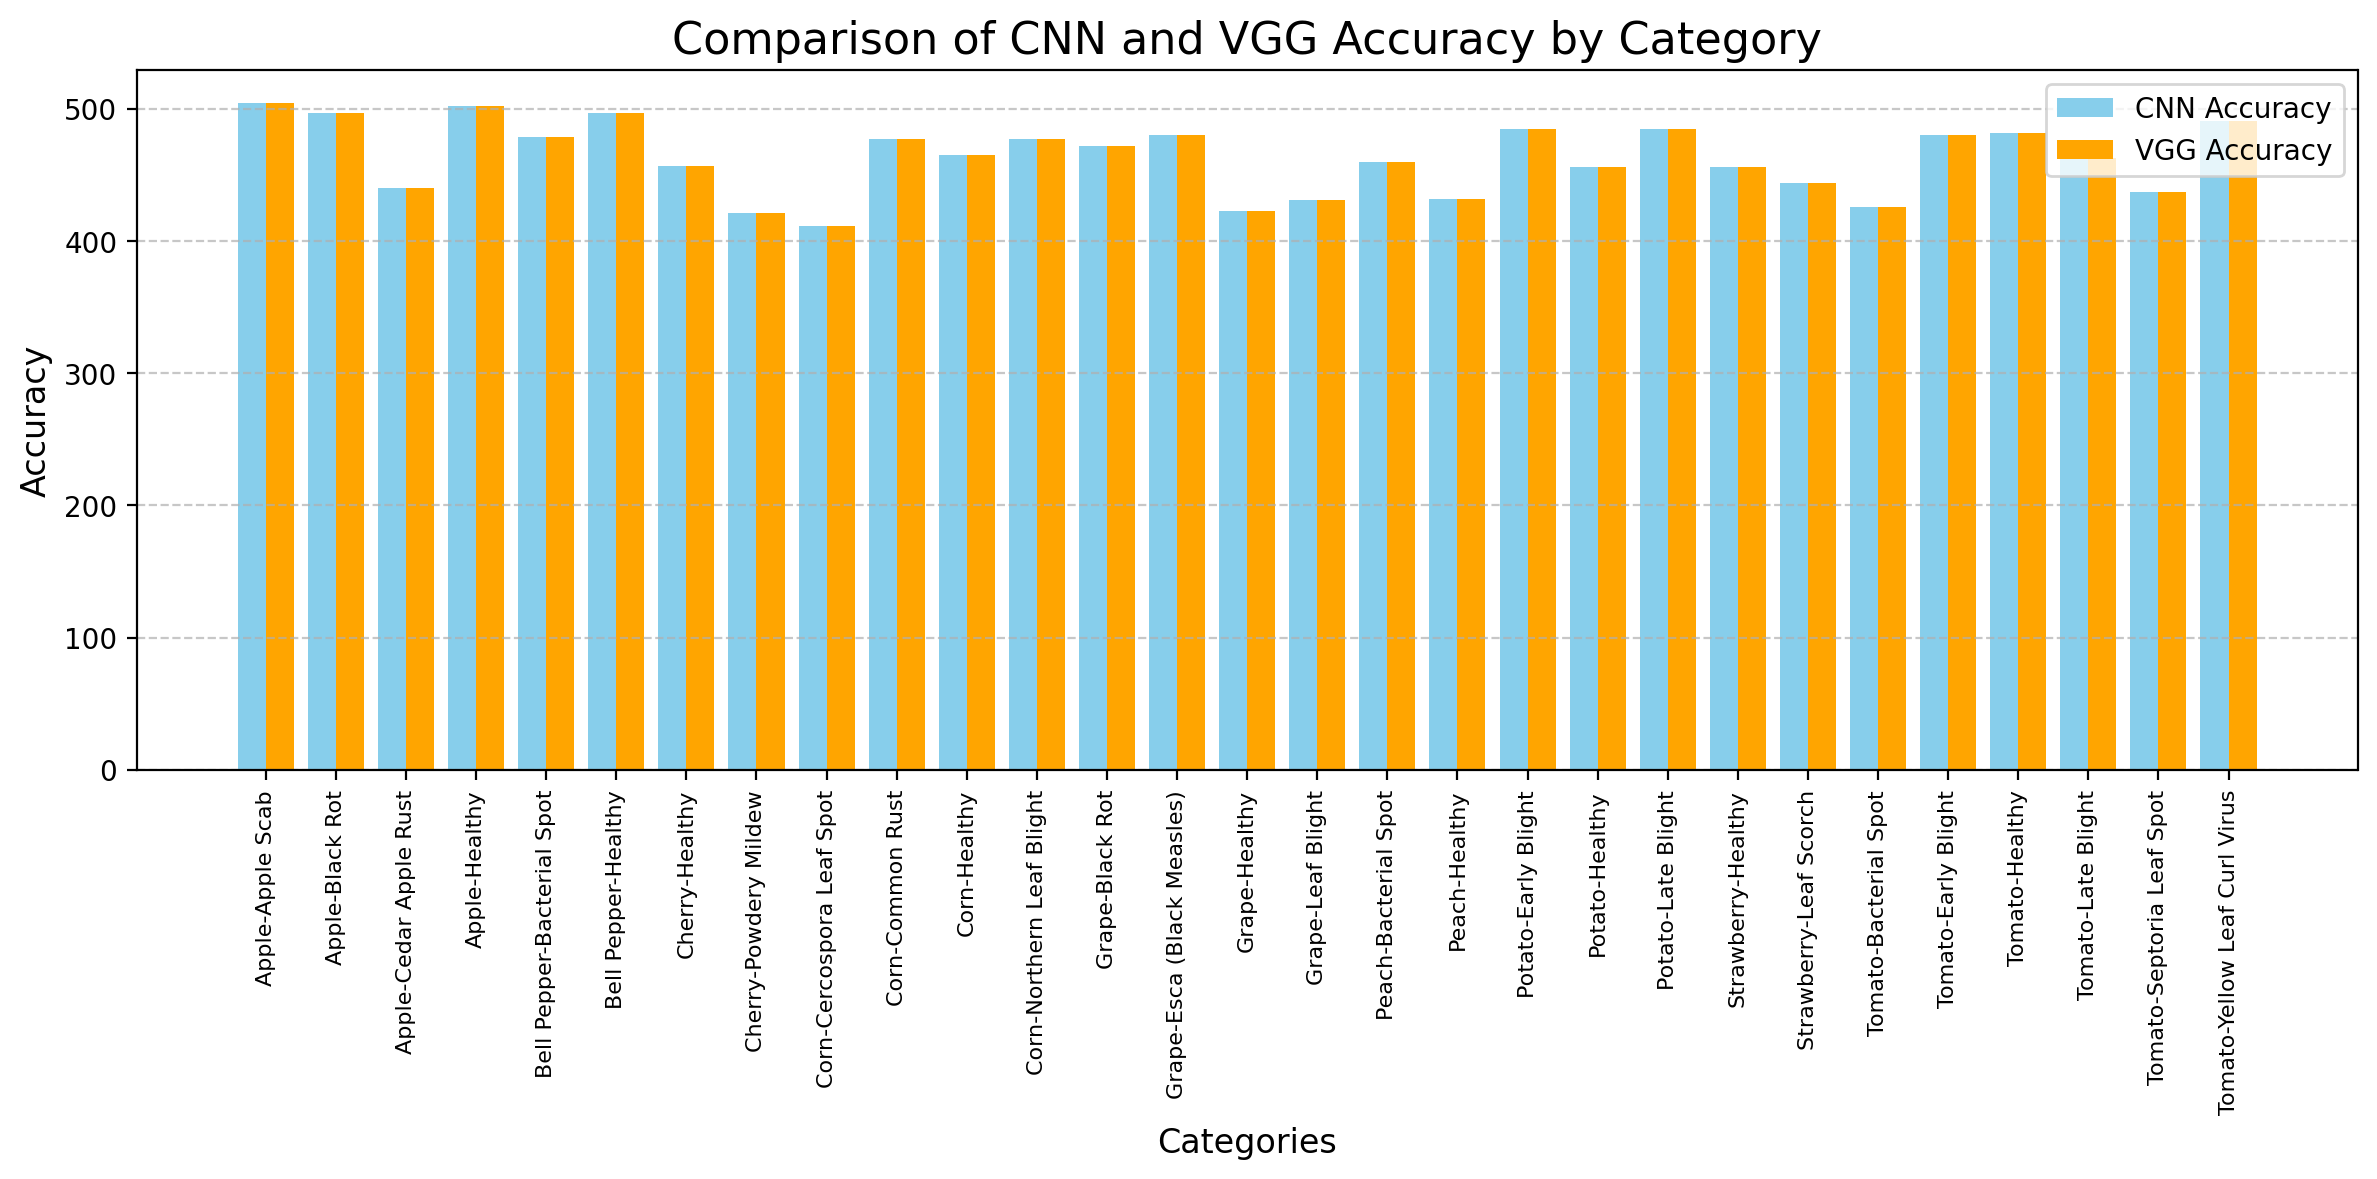

In [77]:
x = np.arange(len(classes))
width = 0.4

# Create figure and bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, CNN_total, width, label='CNN Accuracy', color='skyblue')
plt.bar(x + width/2, VGG_total, width, label='VGG Accuracy', color='orange')

# Add titles and labels
plt.title('Comparison of CNN and VGG Accuracy by Category', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(x, classes, rotation=90, fontsize=8)

# Add legend and grid for better visualization
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display plot
plt.tight_layout()
plt.show()